In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import re
import seaborn as sns
from scipy.io import arff
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
from pandas import read_csv
pd.pandas.set_option('display.max_columns',None)

In [2]:
vf=pd.read_csv('vf.csv')

In [3]:
vf

Actifs courants  Disponibilités    Stocks  Actifs à long terme  \
0          460670797.0             0.0       0.0          298169181.0   
1          479955357.0             0.0       0.0          306061270.0   
2          512077755.0             0.0       0.0          312982066.0   
3          518716710.0             0.0       0.0          336701838.0   
4          545372613.0             0.0       0.0          333482677.0   
...                ...             ...       ...                  ...   
23829        2071827.0        459310.0  591832.0            5941028.0   
23830        2467704.0        813509.0  660882.0            5815856.0   
23831        2858075.0       1191895.0  643193.0            5856493.0   
23832        2675189.0       1008155.0  609908.0            6202832.0   
23833        2788882.0       1041484.0  657750.0            6493996.0   

       Passifs courants  Passifs à long terme  Valeur nette  Bénéfice net  \
0           536607202.0                   0.0    52172709.0     6371709.0   
1           554643276.0                   0.0    54276101.0     7131128.0   
2           571192875.0                   0.0    56279126.0     5136980.0   
3           572481618.0                   0.0    58148690.0     5974440.0   
4           580836511.0                   0.0    59817963.0     6351239.0   
...                 ...                   ...           ...           ...   
23829         1560116.0             1521876.0     4930863.0      187411.0   
23830         1508687.0             1998898.0     4775975.0      204740.0   
23831         1801311.0             2191277.0     4721980.0      129077.0   
23832         1810919.0             2188507.0     4878595.0      376177.0   
23833         1918806.0             2177220.0     5186852.0      456197.0   

       Prêt à long terme  Revenu brut  Actifs fixes  \
0              4496350.0   20179781.0     4568009.0   
1              9671813.0   21917952.0     4575102.0   
2             14017792.0   26876734.0     4707833.0   
3             15117096.0   21105535.0     5062238.0   
4             17666553.0   22500822.0     5114117.0   
...                  ...          ...           ...   
23829                0.0    1013076.0     2034110.0   
23830                0.0     850399.0     1992303.0   
23831                0.0     761302.0     1950794.0   
23832                0.0    1281652.0     1920580.0   
23833                0.0    1365710.0     1910941.0   

       Ratio de couverture des intérêts  Ratio de liquidité  \
0                            176.443447            1.414144   
1                            142.250987            1.417157   
2                            172.961100            1.444450   
3                            216.438728            1.494229   
4                            138.709756            1.513085   
...                                 ...                 ...   
23829                          9.550313            2.599895   
23830                          1.066317            2.361613   
23831                          0.378786            2.182687   
23832                          4.459962            2.219824   
23833                         14.140048            2.266313   

       Ratio de bénéfice exploitation  credit_decision  \
0                            1.507647                0   
1                            1.504398                0   
2                            1.081095                0   
3                            1.524324                0   
4                            1.345919                0   
...                               ...              ...   
23829                        0.861748                0   
23830                        1.415508                0   
23831                        0.771527                0   
23832                        1.538447                0   
23833                        1.025500                0   

       Trésorerie nette par action  Stockholders_equity_to_fixed_assets_ratio  \
0        

In [4]:
nan_counts = vf.isnull().sum()
print("Nombre de valeurs NaN dans chaque colonne :\n", nan_counts)

Nombre de valeurs NaN dans chaque colonne :
 Actifs courants                              0
Disponibilités                               0
Stocks                                       0
Actifs à long terme                          0
Passifs courants                             0
Passifs à long terme                         0
Valeur nette                                 0
Bénéfice net                                 0
Prêt à long terme                            0
Revenu brut                                  0
Actifs fixes                                 0
Ratio de couverture des intérêts             0
Ratio de liquidité                           0
Ratio de bénéfice exploitation               0
credit_decision                              0
Trésorerie nette par action                  0
Stockholders_equity_to_fixed_assets_ratio    0
Current_debt_ratio                           0
Return_On_Equity_ROE                         0
Number of Employees                          0
Rang           

In [5]:
duplicates = vf.duplicated().sum()
print("Nombre de lignes en double :", duplicates)




Nombre de lignes en double : 0


EDA

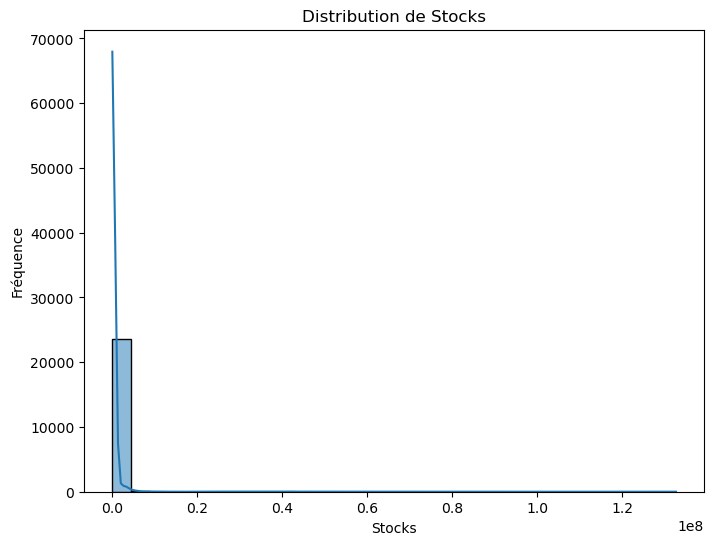

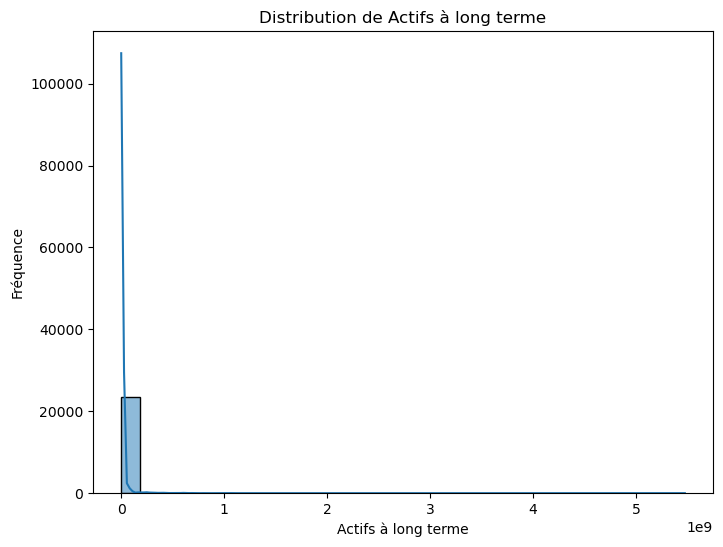

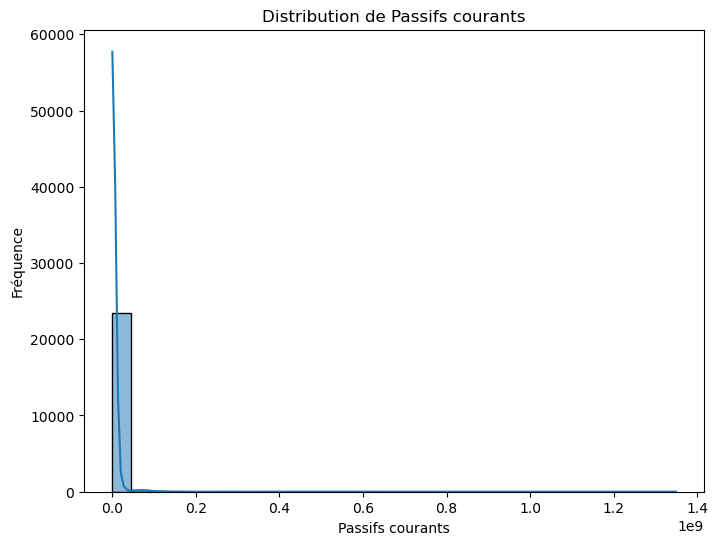

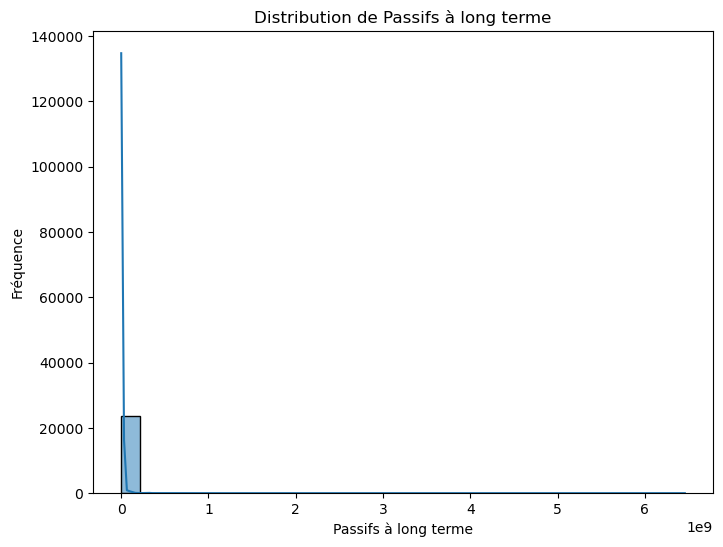

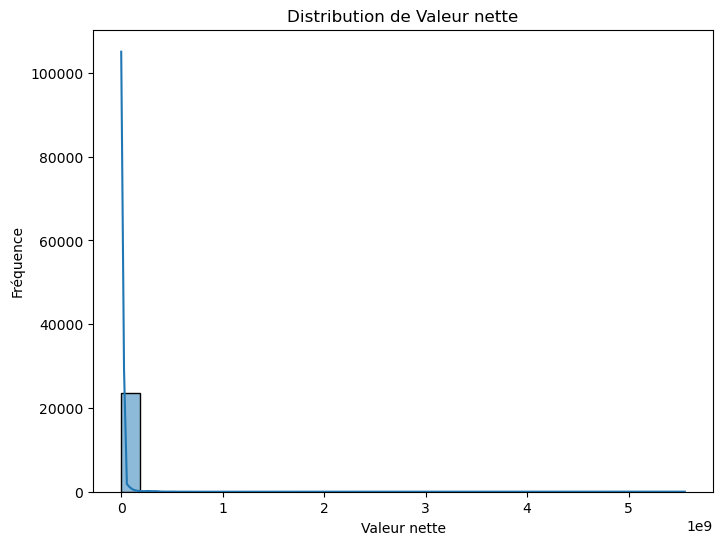

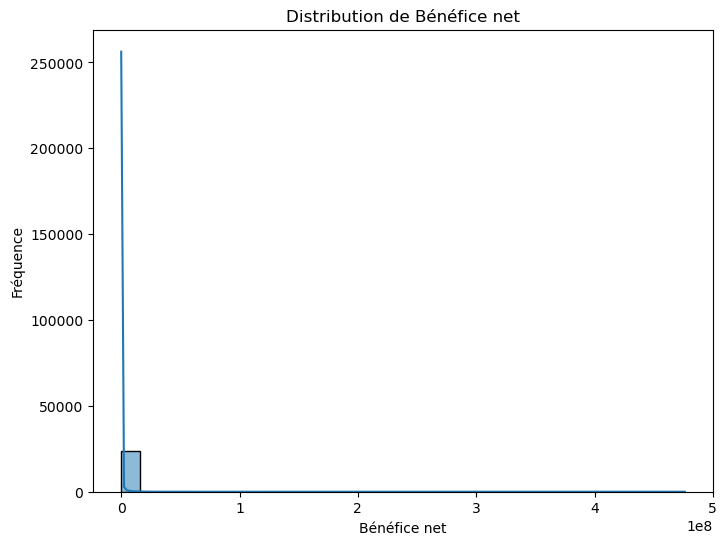

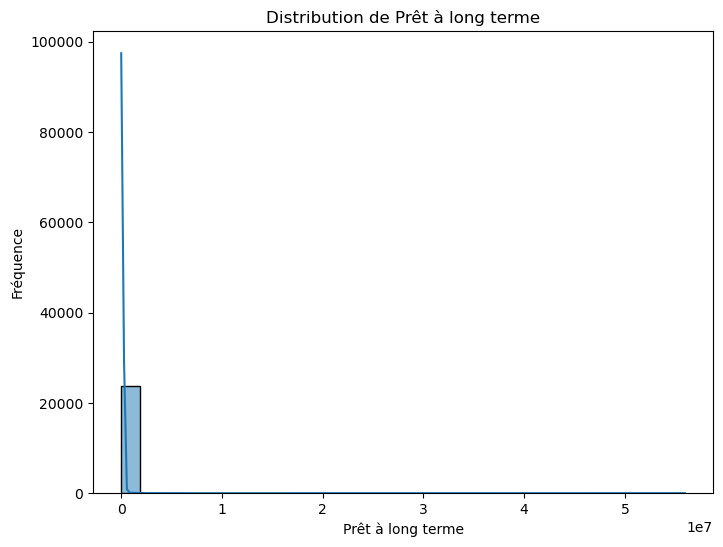

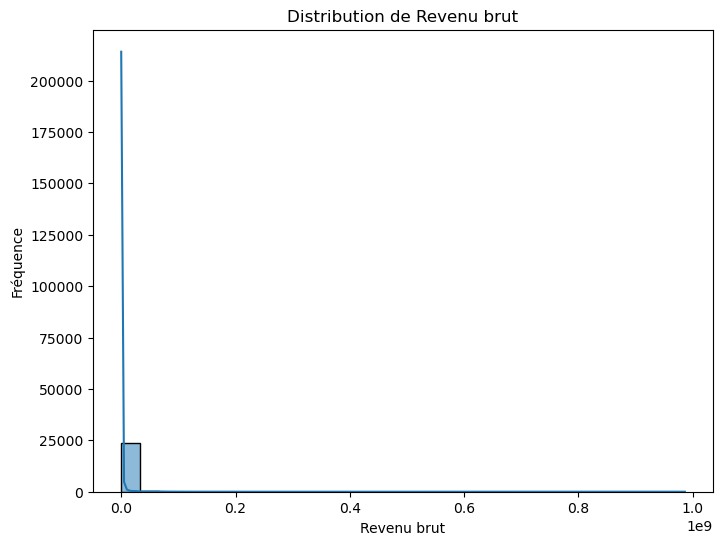

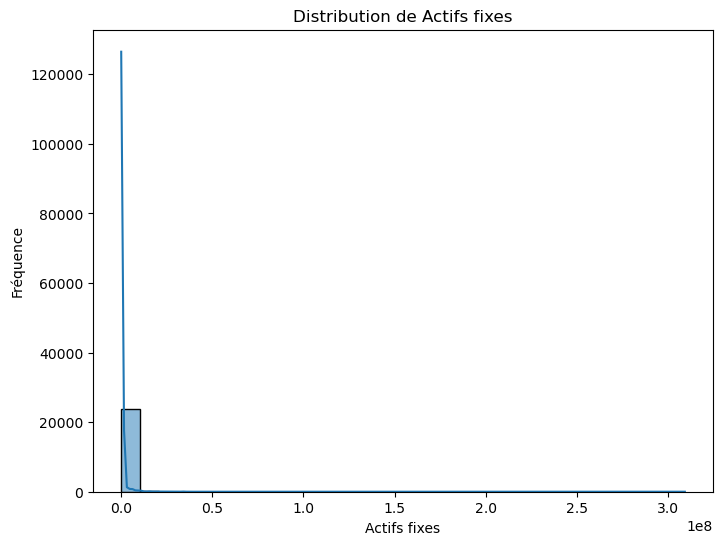

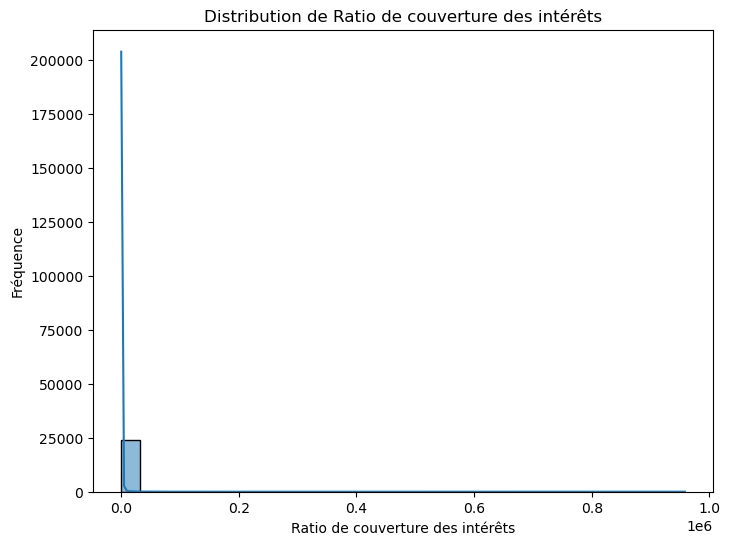

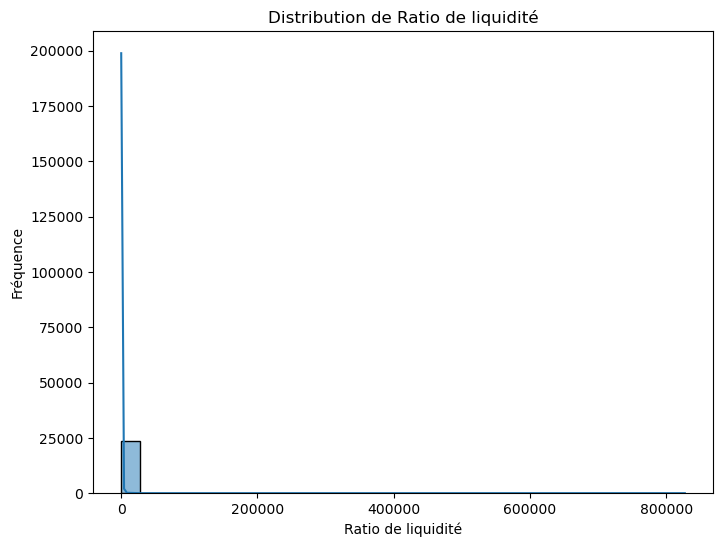

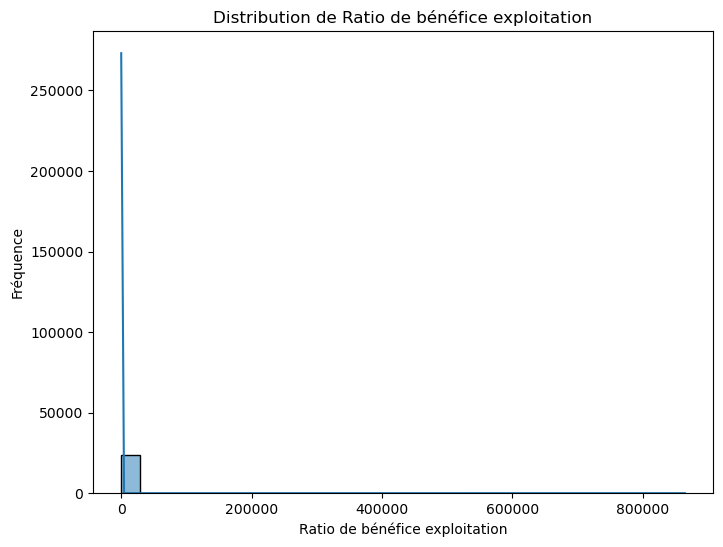

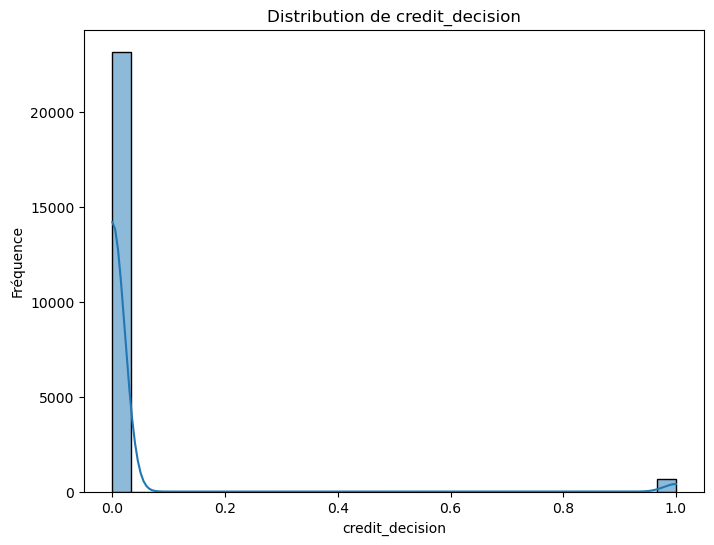

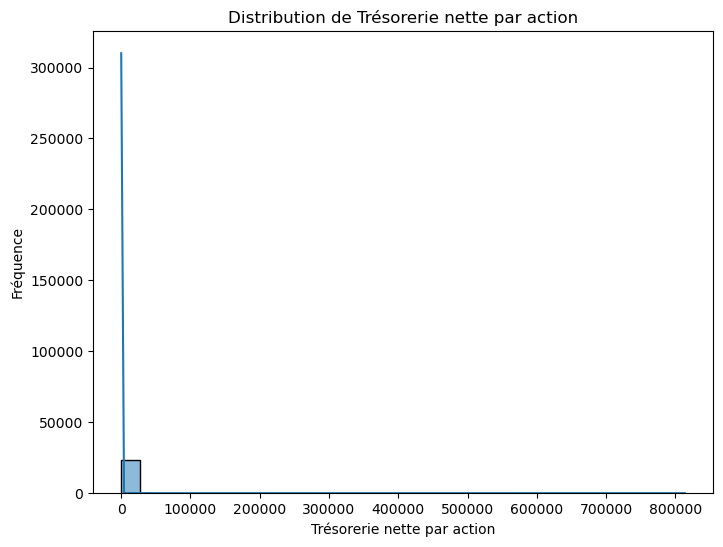

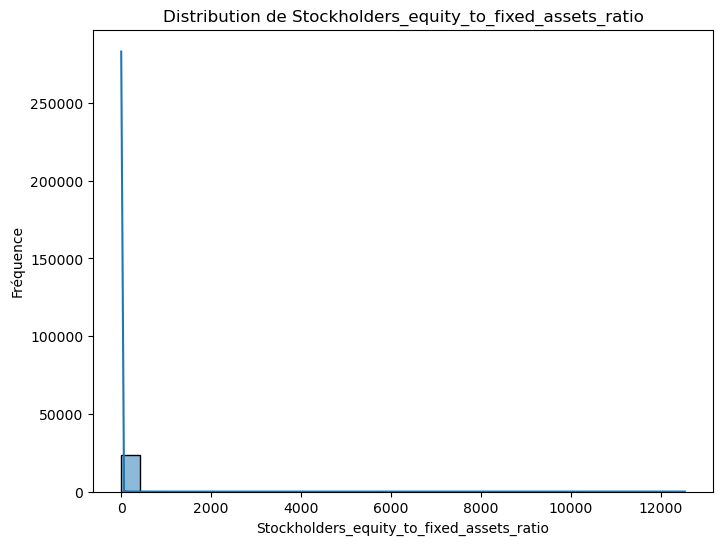

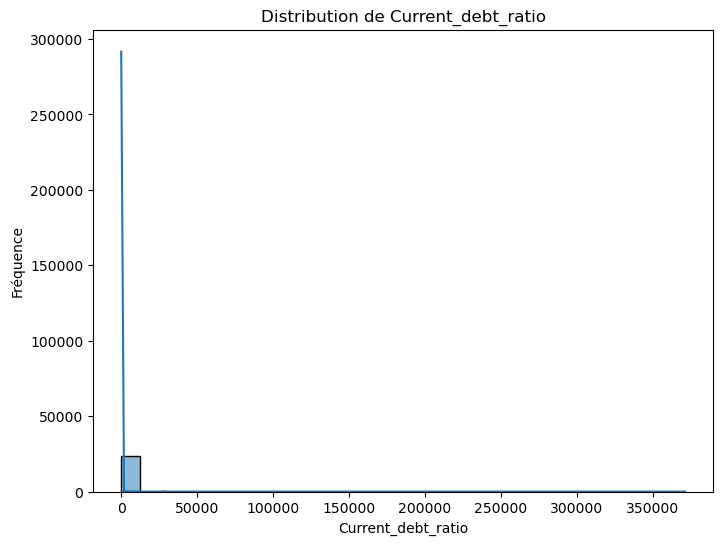

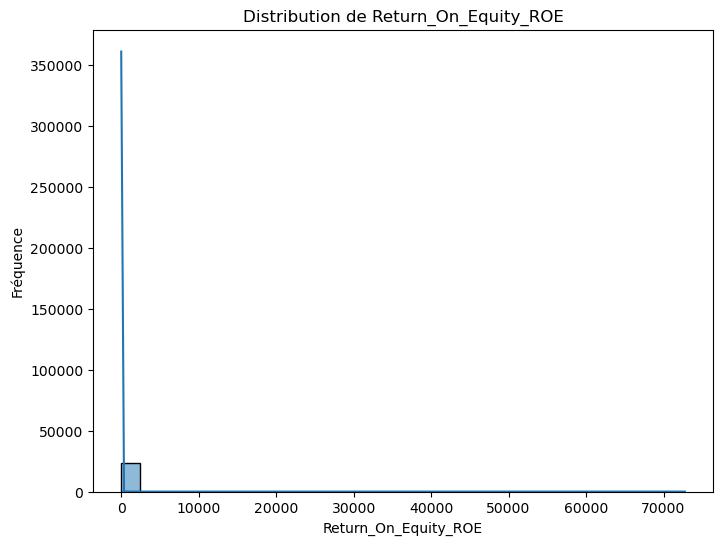

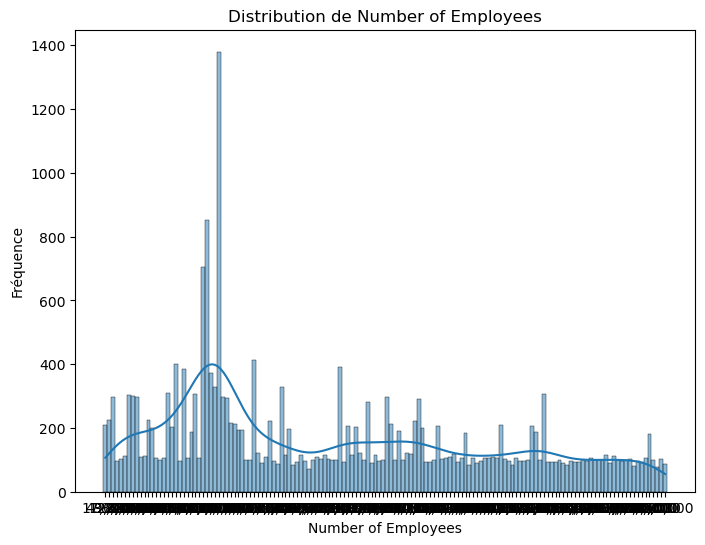

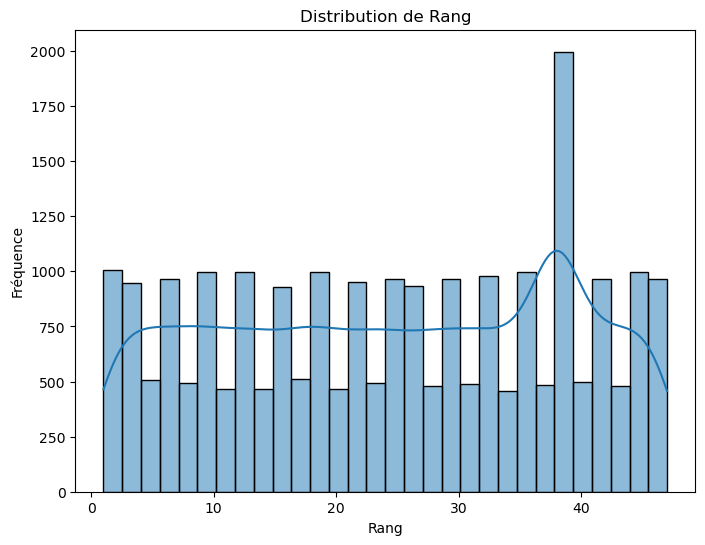

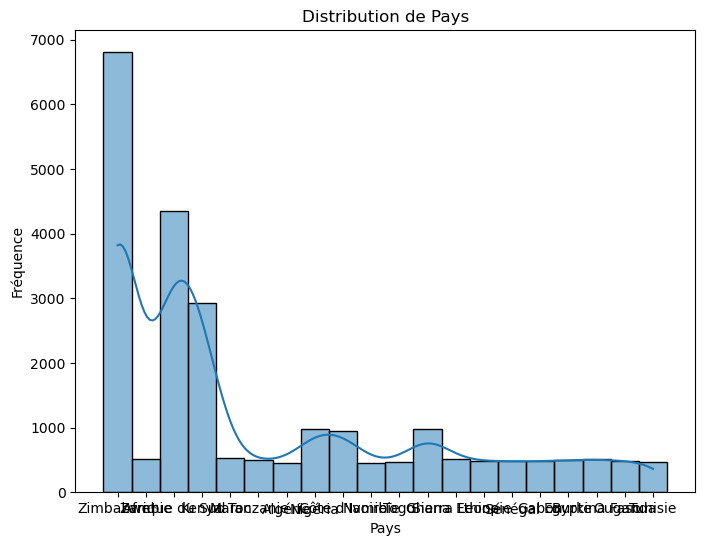

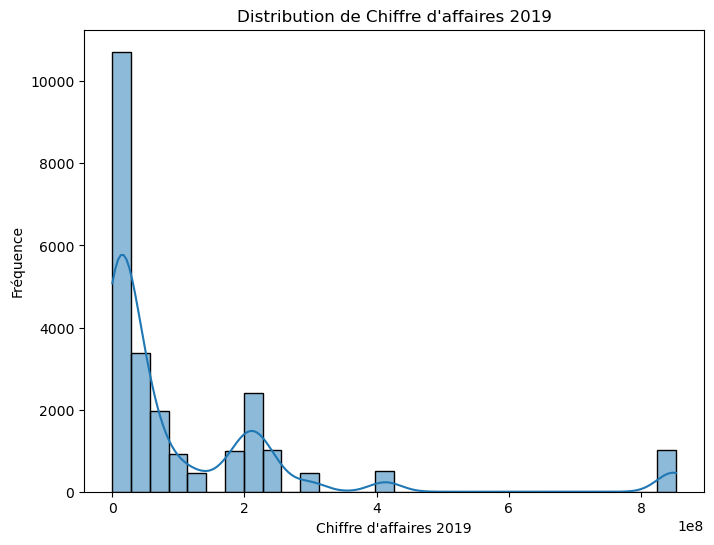

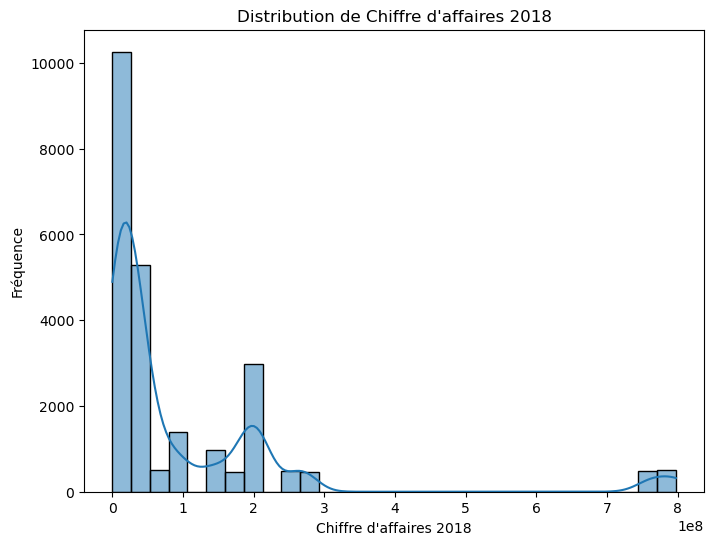

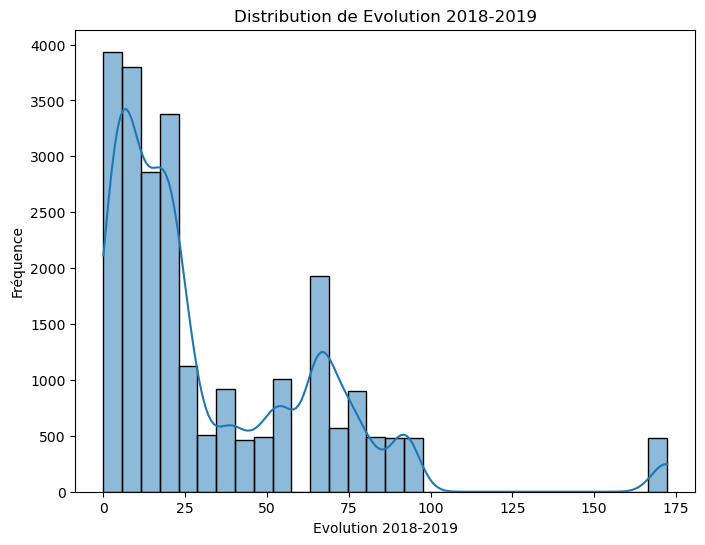

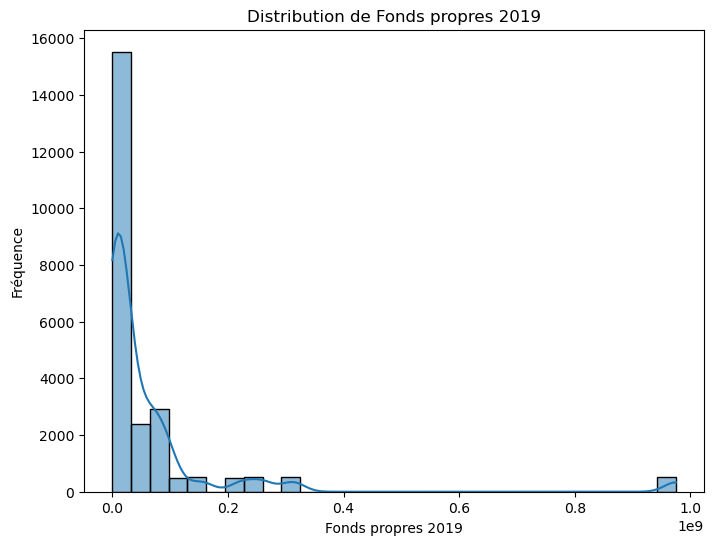

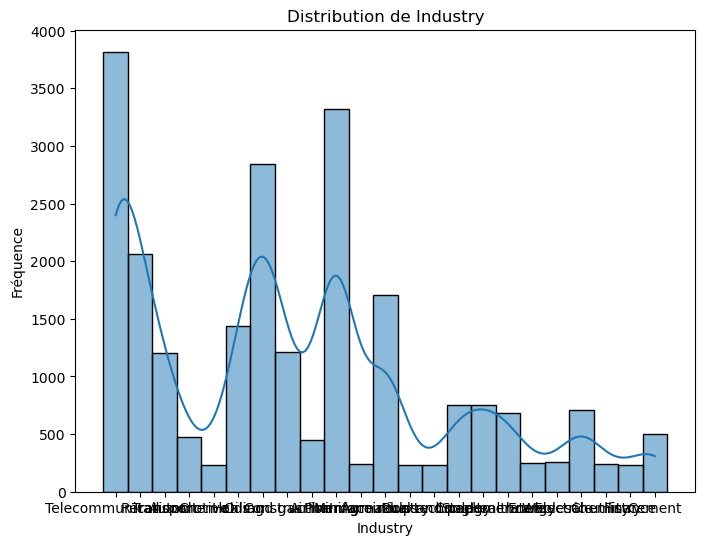

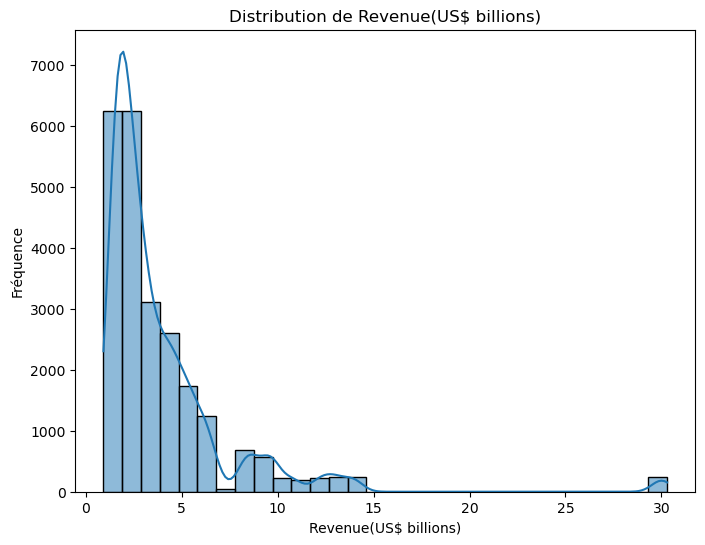

In [6]:
num_cols = vf.columns[2:-1] 
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(vf[col], bins=30, kde=True)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()

In [7]:
from scipy.stats import anderson
numeric_cols = vf.select_dtypes(include=['float', 'int']).columns
for col in numeric_cols:
    if vf[col].isnull().any().any():
        print(f"La colonne '{col}' contient des valeurs NaN.")
    else:
        result = anderson(vf[col].values.flatten()) 
        print(f"Pour la colonne '{col}': Statistique de test = {result.statistic}, p-valeurs = {result.critical_values}, Niveaux de signification = {result.significance_level}")

Pour la colonne 'Actifs courants': Statistique de test = 8377.941055225634, p-valeurs = [0.576 0.656 0.787 0.918 1.092], Niveaux de signification = [15.  10.   5.   2.5  1. ]
Pour la colonne 'Disponibilités': Statistique de test = 8262.174560984338, p-valeurs = [0.576 0.656 0.787 0.918 1.092], Niveaux de signification = [15.  10.   5.   2.5  1. ]
Pour la colonne 'Stocks': Statistique de test = 8247.674065693449, p-valeurs = [0.576 0.656 0.787 0.918 1.092], Niveaux de signification = [15.  10.   5.   2.5  1. ]
Pour la colonne 'Actifs à long terme': Statistique de test = 7744.085709120438, p-valeurs = [0.576 0.656 0.787 0.918 1.092], Niveaux de signification = [15.  10.   5.   2.5  1. ]
Pour la colonne 'Passifs courants': Statistique de test = 8144.343814087177, p-valeurs = [0.576 0.656 0.787 0.918 1.092], Niveaux de signification = [15.  10.   5.   2.5  1. ]
Pour la colonne 'Passifs à long terme': Statistique de test = 8397.89163399781, p-valeurs = [0.576 0.656 0.787 0.918 1.092], Nivea

In [8]:
def find_highly_correlated_features(vf):
    threshold = 0.75
    numerical_df = vf.select_dtypes(include=[np.number])
    
    correlation_matrix = numerical_df.corr()
    correlated_features = np.where(np.abs(correlation_matrix) > threshold)
    correlated_features = [(correlation_matrix.index[x], correlation_matrix.columns[y]) for x, y in zip(*correlated_features)
                           if x != y and x < y]
    
    correlated_features_dict = {}
    for f1, f2 in correlated_features:
        if f1 not in correlated_features_dict:
            correlated_features_dict[f1] = [f2]
        else:
            correlated_features_dict[f1].append(f2)
    
    return correlated_features_dict
highly_correlated = find_highly_correlated_features(vf)
for feature, correlated in highly_correlated.items():
    print(f"Feature '{feature}' is highly correlated with: [ {' , '.join(correlated)} ]")

Feature 'Actifs courants' is highly correlated with: [ Valeur nette ]
Feature 'Actifs à long terme' is highly correlated with: [ Passifs à long terme ]
Feature 'Passifs courants' is highly correlated with: [ Prêt à long terme ]
Feature 'Bénéfice net' is highly correlated with: [ Revenu brut ]
Feature 'Chiffre d'affaires 2019' is highly correlated with: [ Chiffre d'affaires 2018 , Fonds propres 2019 ]
Feature 'Chiffre d'affaires 2018' is highly correlated with: [ Fonds propres 2019 ]


### Current Assets:
Current assets, also known as short-term assets, are the financial resources and assets of a company that are liquid and are typically expected to be used or converted into cash within a year. These assets typically include items such as inventory, accounts receivable, and cash.

### Net Worth:
Net worth represents the total value of assets of a person, company, or other entity after deducting all debts. In other words, it is what remains when you subtract all financial obligations (such as debts, taxes, etc.) from the total assets. Net worth is often used to assess the financial health of an individual or a company.


## so financially , we're going to drop Current Asset to eleminate redundency

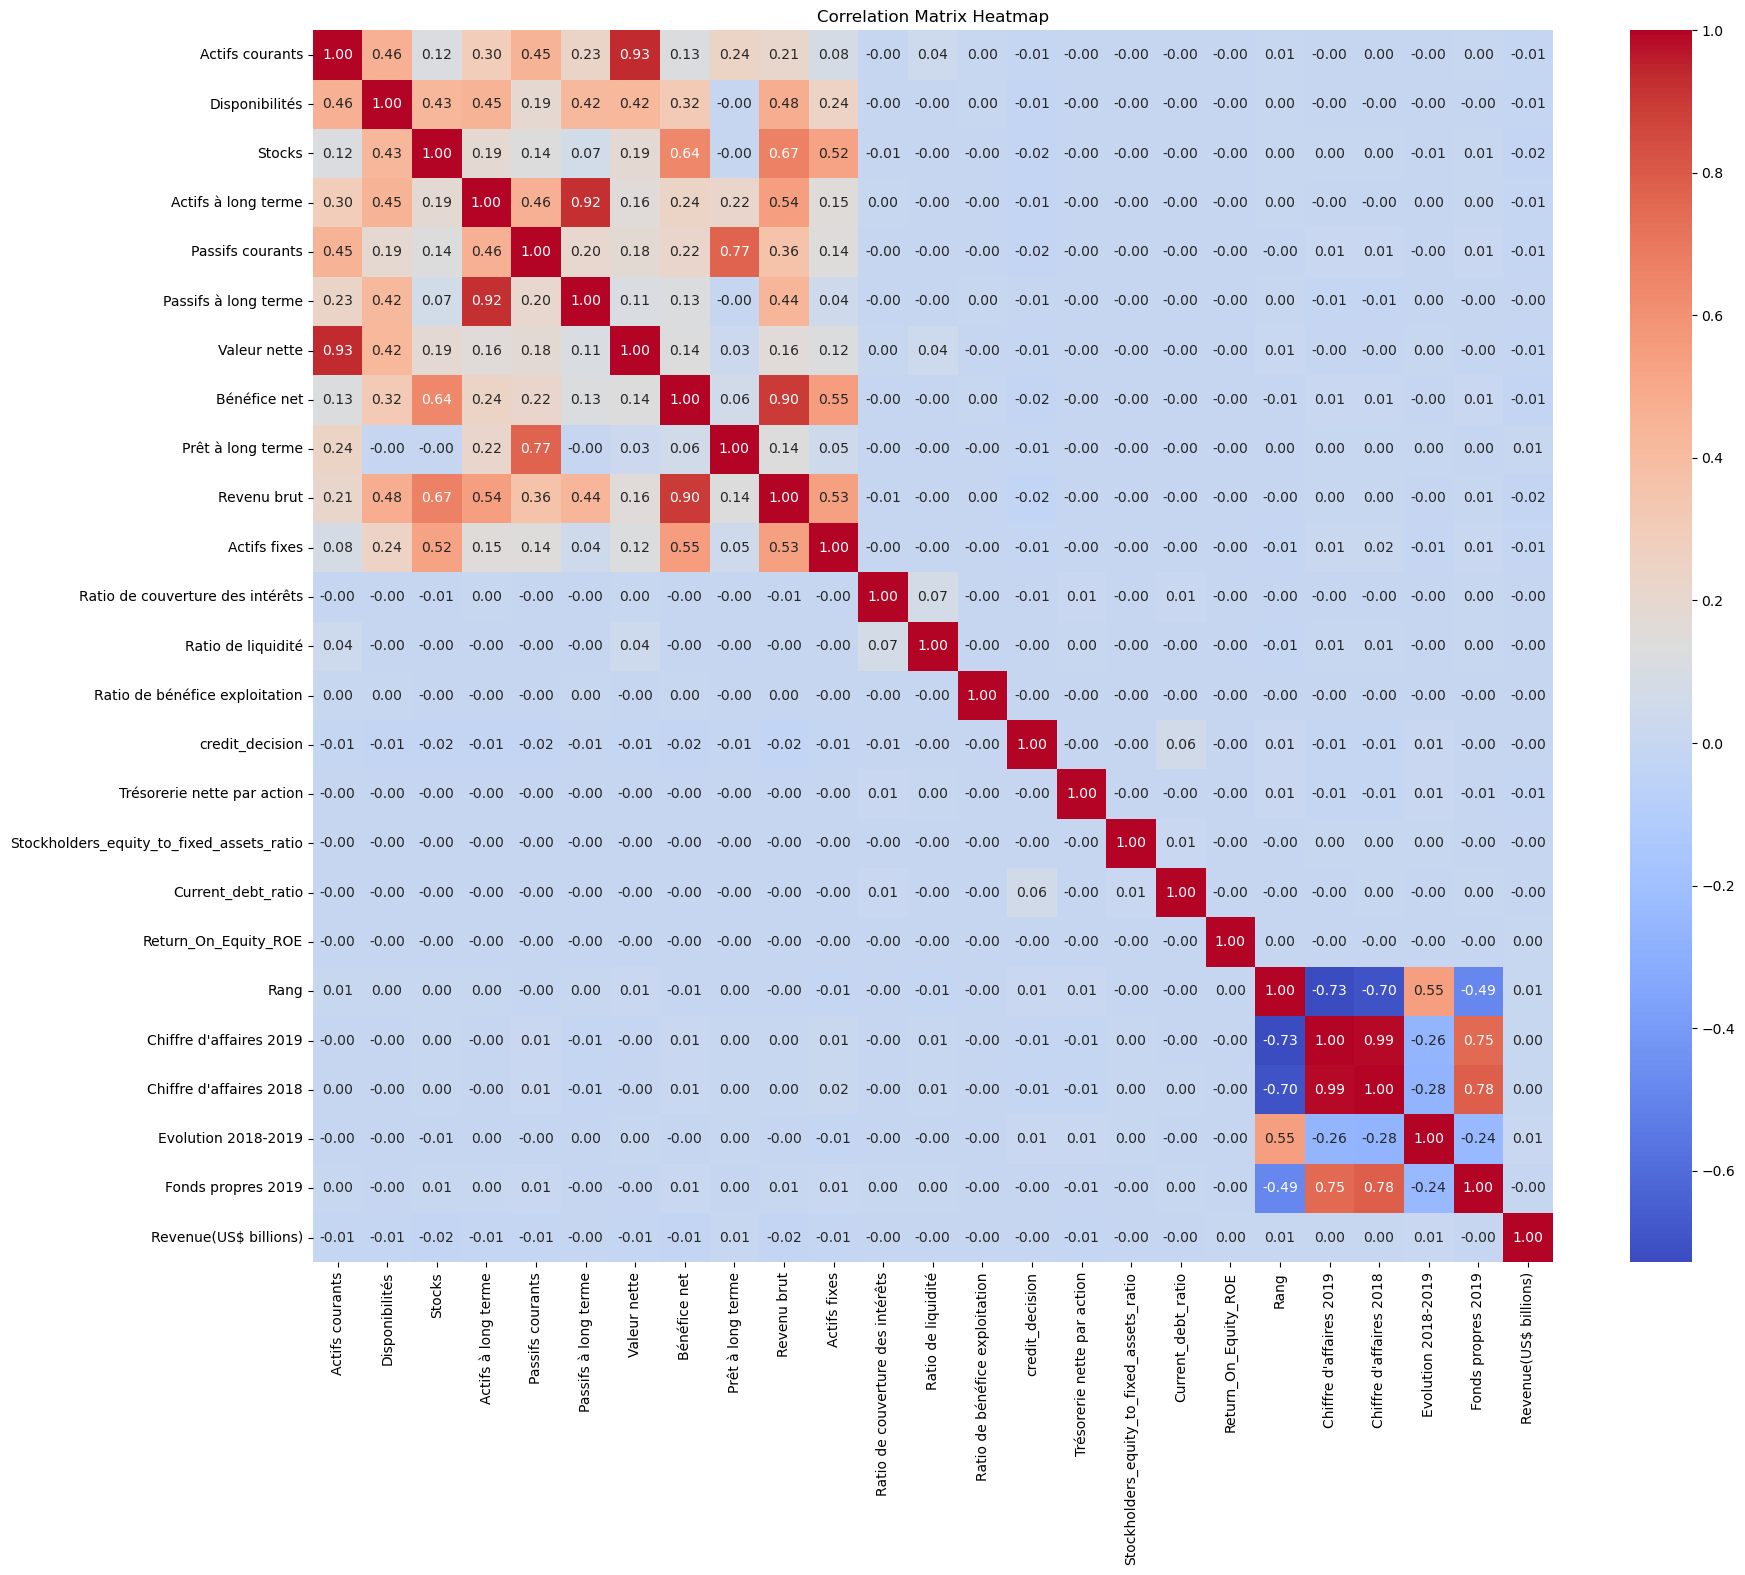

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def correlation_matrix_heatMap(df_combined_augmented):
    numeric_data = df_combined_augmented.select_dtypes(include=['float64', 'int64'])
    correlation_matrix = numeric_data.corr()
    plt.figure(figsize=(20,16))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix Heatmap')
    plt.show()
correlation_matrix_heatMap(vf)

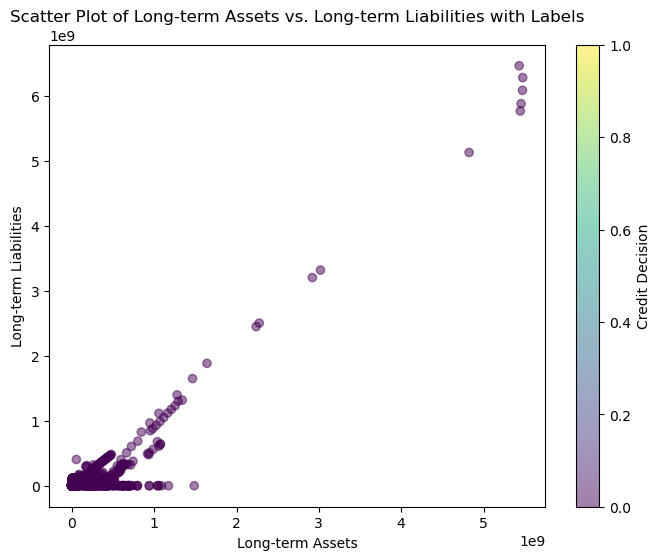

In [10]:
long_term_assets = vf['Actifs à long terme']
long_term_liabilities = vf['Passifs à long terme']
labels = vf['credit_decision'] 

plt.figure(figsize=(8, 6))
plt.scatter(long_term_assets, long_term_liabilities, c=labels, cmap='viridis', alpha=0.5)

plt.xlabel('Long-term Assets')
plt.ylabel('Long-term Liabilities')
plt.title('Scatter Plot of Long-term Assets vs. Long-term Liabilities with Labels')

plt.colorbar(label='Credit Decision')

plt.show()

In [11]:
unique_long_term_assets = vf['Actifs à long terme'].nunique()
unique_long_term_liabilities = vf['Passifs à long terme'].nunique()
print("Number of unique values for 'Actifs à long terme':", unique_long_term_assets)
print("Number of unique values for 'Passifs à long terme':", unique_long_term_liabilities)


Number of unique values for 'Actifs à long terme': 22044
Number of unique values for 'Passifs à long terme': 18882


## As we can see we are going to drop  'Passifs à long terme' to  eliminate redundency

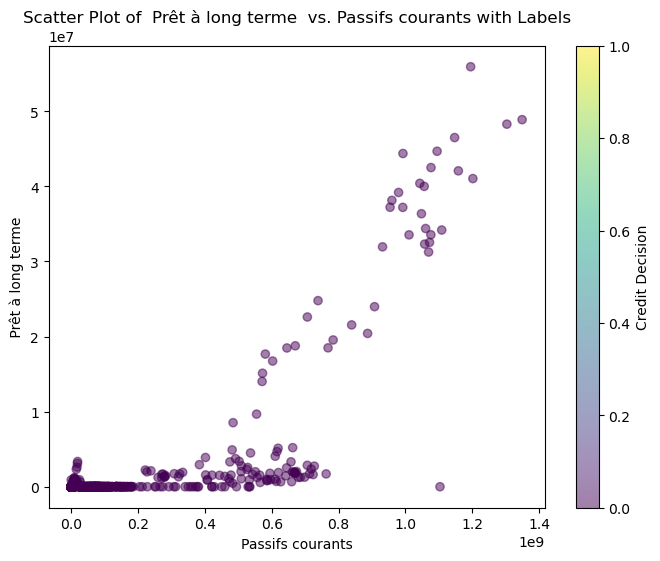

In [12]:
long_term_assets = vf['Passifs courants']
long_term_liabilities = vf['Prêt à long terme']
labels = vf['credit_decision'] 
plt.figure(figsize=(8, 6))
plt.scatter(long_term_assets, long_term_liabilities, c=labels, cmap='viridis', alpha=0.5)
plt.xlabel('Passifs courants')
plt.ylabel(' Prêt à long terme ')
plt.title('Scatter Plot of  Prêt à long terme  vs. Passifs courants with Labels')
plt.colorbar(label='Credit Decision')
plt.show()

In [13]:
Passifs_courants = vf['Passifs courants'].nunique()
Pret_a_long_terme = vf['Prêt à long terme'].nunique()
print("Number of unique values for 'Passifs courants':", Passifs_courants)
print("Number of unique values for 'Prêt à long terme':", Pret_a_long_terme)

Number of unique values for 'Passifs courants': 21371
Number of unique values for 'Prêt à long terme': 333


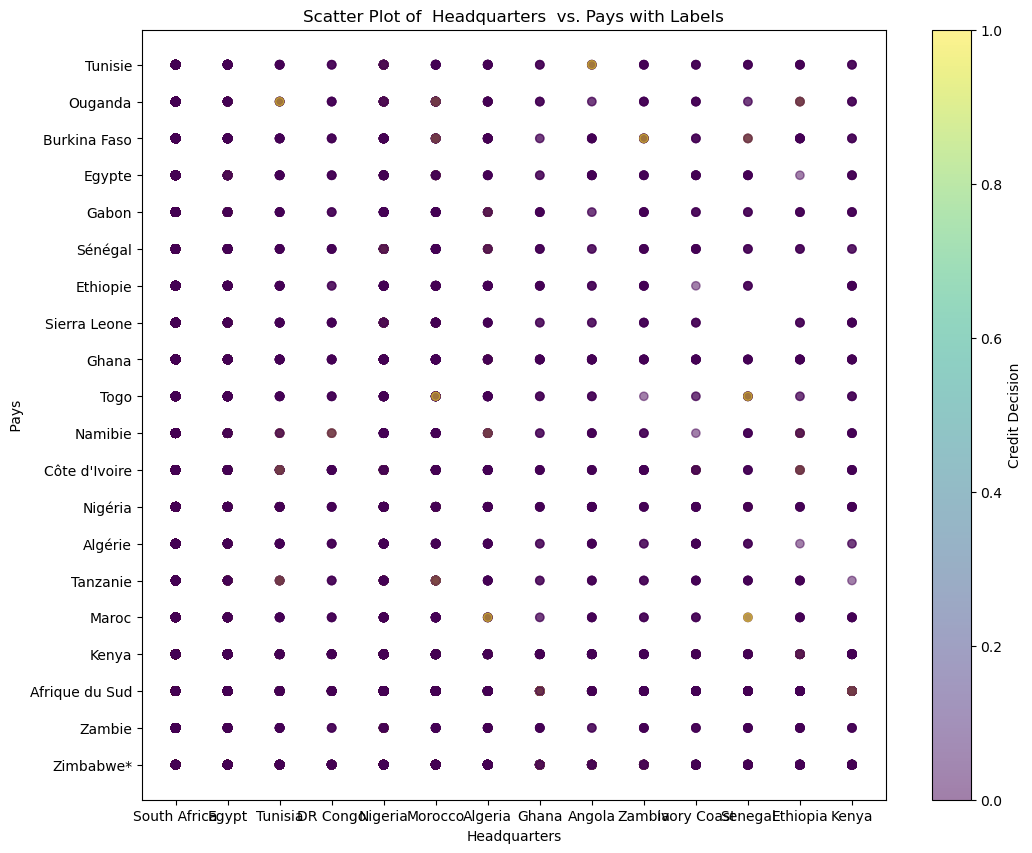

In [14]:
long_term_assets = vf['Headquarters']
long_term_liabilities = vf['Pays']
labels = vf['credit_decision'] 
plt.figure(figsize=(12, 10))
plt.scatter(long_term_assets, long_term_liabilities, c=labels, cmap='viridis', alpha=0.5)
plt.xlabel('Headquarters')
plt.ylabel(' Pays ')
plt.title('Scatter Plot of  Headquarters  vs. Pays with Labels')
plt.colorbar(label='Credit Decision')
plt.show()

In [15]:
Headquarters = vf['Headquarters'].nunique()
Pays = vf['Pays'].nunique()
print("Number of unique values for 'quarters':", Headquarters)
print("Number of unique values for 'Pays':", Pays)

Number of unique values for 'quarters': 14
Number of unique values for 'Pays': 20


In [16]:
Industry = vf['Industry'].nunique()
print("Number of unique values for 'industry':", Industry)


Number of unique values for 'industry': 23


In [17]:
vf['Industry'].unique()


array(['Telecommunications', 'Retail', 'Transport', 'Automotive',
       'Chemicals', 'Holding', 'Oil and gas', 'Construction', 'Airline',
       'Mining', 'Pharmaceuticals', 'Agroindustry',
       'Information technology', 'Pulp and paper', 'Steel',
       'Conglomerate', 'Healthcare', 'Energy', 'Wholesale',
       'Electric utility', 'Chemistry', 'Finance', 'Cement'], dtype=object)

### we are giong to drop  'Prêt à long terme' to eliminate redondancy

In [18]:
import pandas as pd
Benefice_net = vf['Bénéfice net'].nunique()
Revenu_brut = vf['Revenu brut'].nunique()
print("Number of unique values for 'Bénéfice net':", Benefice_net)
print("Number of unique values for 'Revenu brut':", Revenu_brut)


Number of unique values for 'Bénéfice net': 14873
Number of unique values for 'Revenu brut': 15735


### as chiffre d'affaire 2018 and chiffre d'affaire 2019 are highly corrolated we re going to deal with them in the step of feature engeneering later 

In [19]:
features_to_drop = ['Passifs à long terme', 'Prêt à long terme','Revenu brut','Headquarters','Rang']
vf = vf.drop(features_to_drop, axis=1)

In [20]:
vf.columns

Index(['Actifs courants', 'Disponibilités', 'Stocks', 'Actifs à long terme',
       'Passifs courants', 'Valeur nette', 'Bénéfice net', 'Actifs fixes',
       'Ratio de couverture des intérêts', 'Ratio de liquidité',
       'Ratio de bénéfice exploitation', 'credit_decision',
       'Trésorerie nette par action',
       'Stockholders_equity_to_fixed_assets_ratio', 'Current_debt_ratio',
       'Return_On_Equity_ROE', 'Number of Employees', 'Pays',
       'Chiffre d'affaires 2019', 'Chiffre d'affaires 2018',
       'Evolution 2018-2019', 'Fonds propres 2019', 'Industry',
       'Revenue(US$ billions)'],
      dtype='object')

In [21]:
!pip install cufflinks

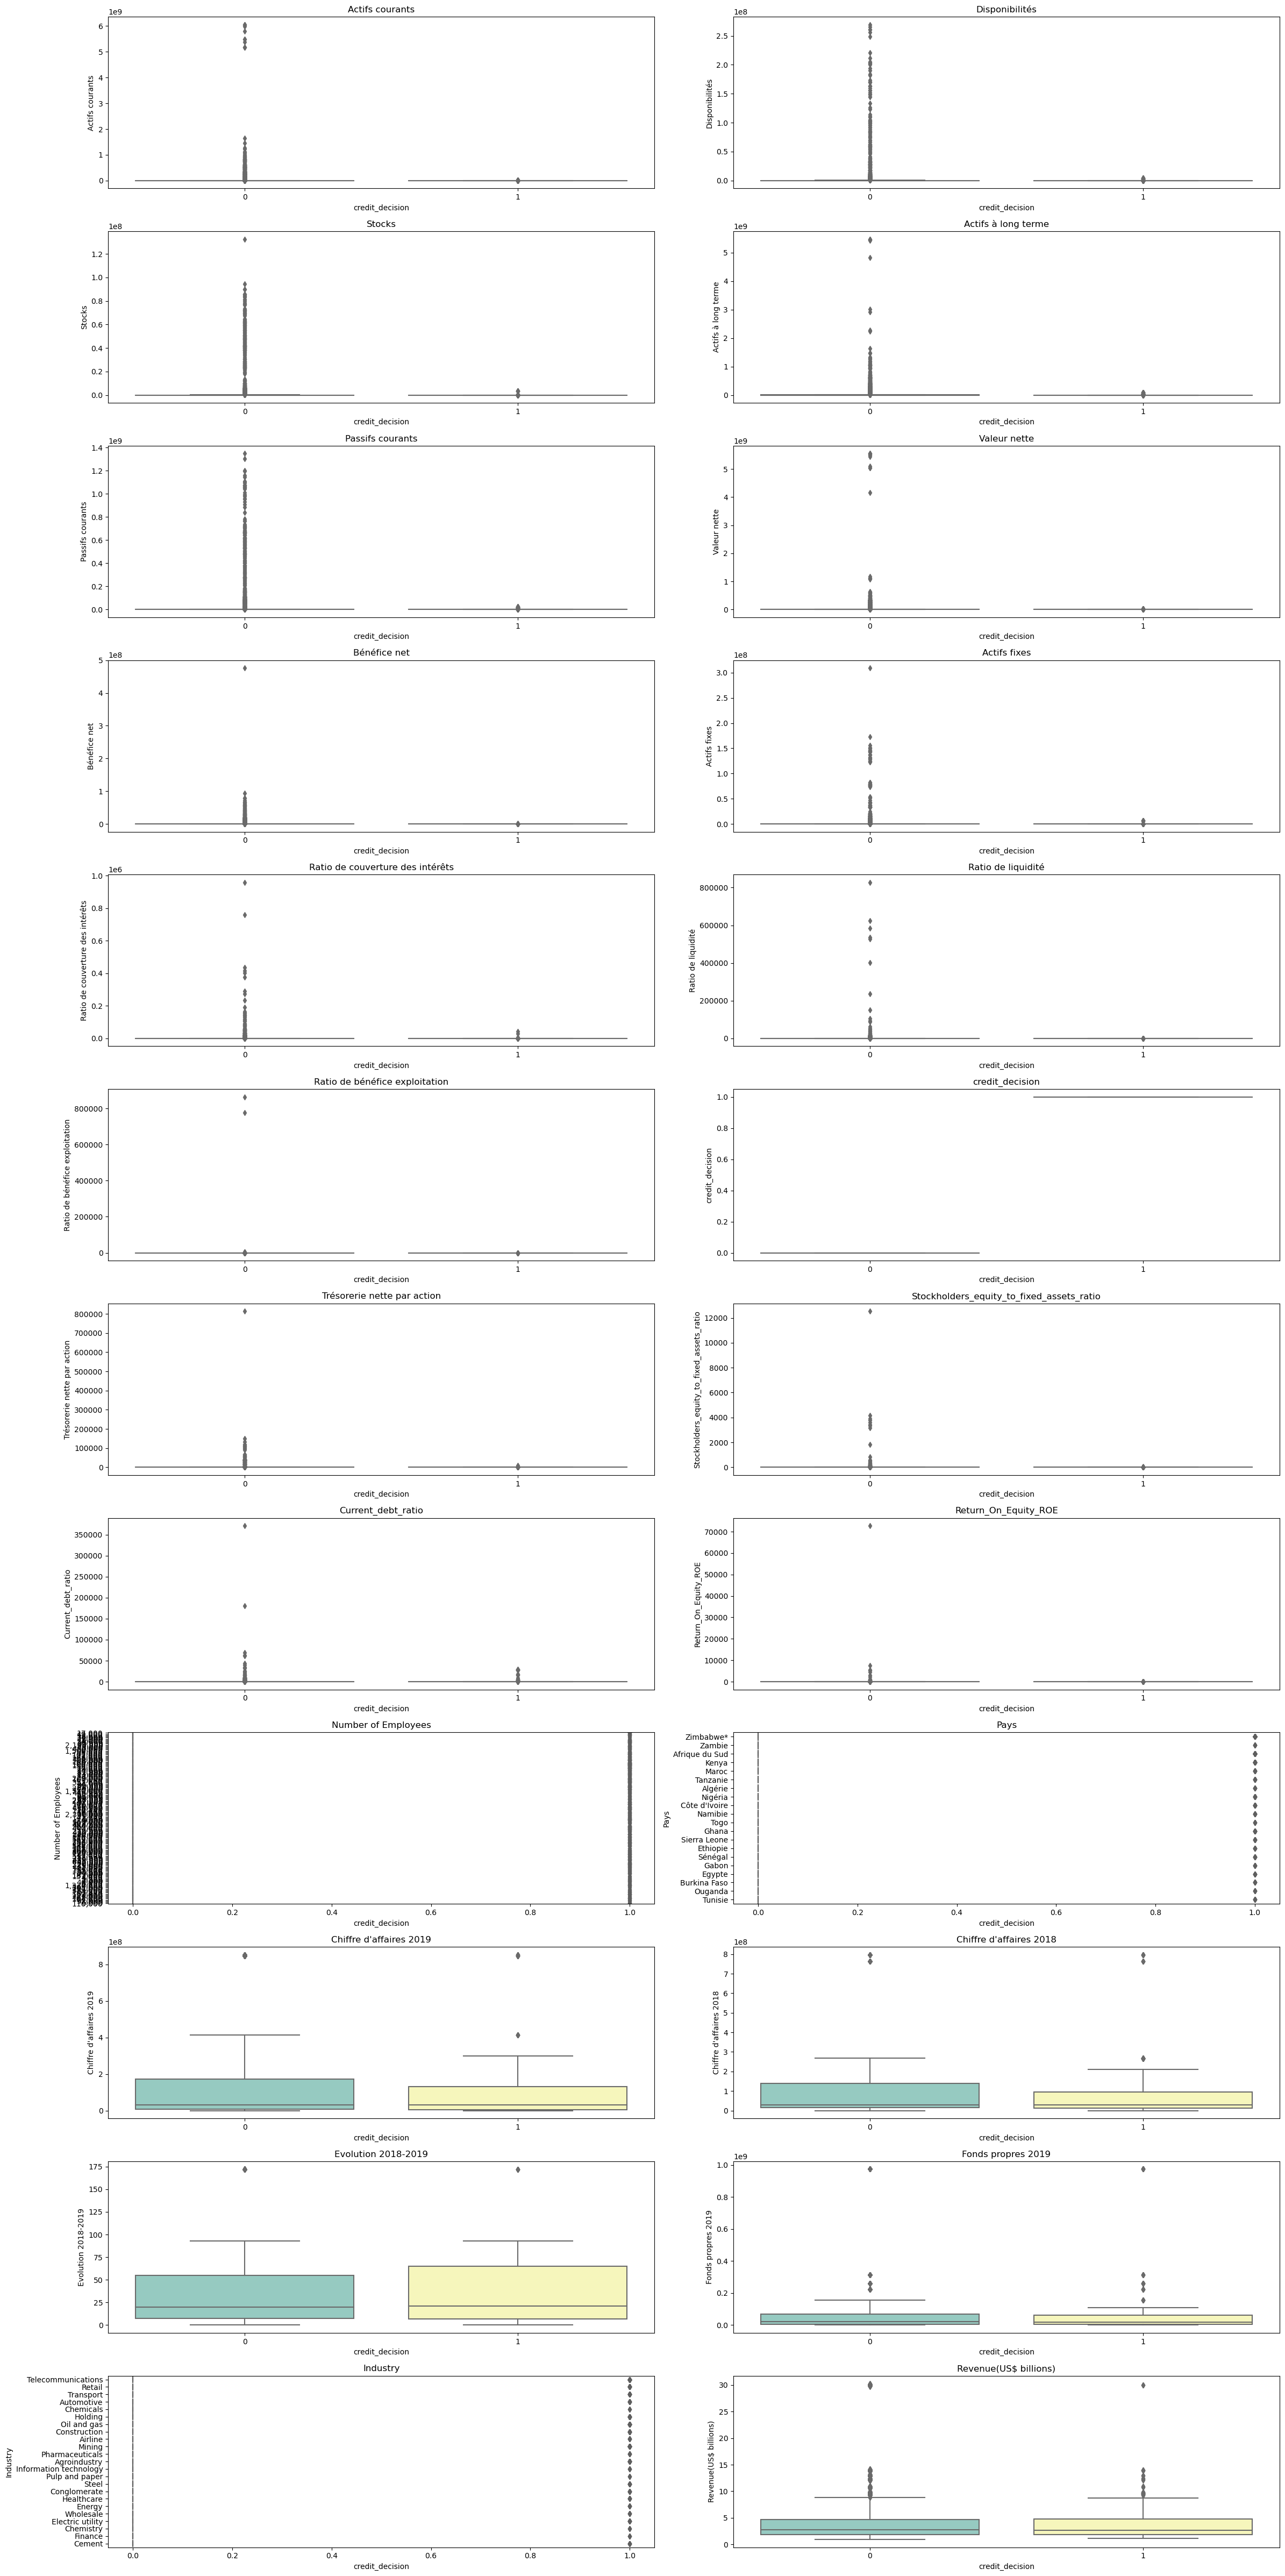

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
columns_to_visualize = ['Actifs courants', 'Disponibilités', 'Stocks', 'Actifs à long terme',
                        'Passifs courants', 'Valeur nette', 'Bénéfice net', 'Actifs fixes',
                        'Ratio de couverture des intérêts', 'Ratio de liquidité',
                        'Ratio de bénéfice exploitation', 'credit_decision',
                        'Trésorerie nette par action', 'Stockholders_equity_to_fixed_assets_ratio',
                        'Current_debt_ratio', 'Return_On_Equity_ROE', 'Number of Employees',
                        'Pays', "Chiffre d'affaires 2019", "Chiffre d'affaires 2018",
                        'Evolution 2018-2019', 'Fonds propres 2019', 'Industry',
                        'Revenue(US$ billions)']

num_rows = (len(columns_to_visualize) - 1) // 2 + 1
num_cols = min(len(columns_to_visualize), 2)
figure, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(24, 48))

for idx, column in enumerate(columns_to_visualize):
    row = idx // num_cols
    col = idx % num_cols
    sns.boxplot(x=vf['credit_decision'], y=vf[column], palette="Set3", ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout()
plt.show()


In [23]:
import cufflinks as cf

cf.go_offline()
vf[['Revenue(US$ billions)']].iplot(kind='box', color='pink', xTitle='Estimated_Revenue_Count')


C:\Users\user\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [24]:
Benefice_net = vf['credit_decision'].nunique()
print("Number of unique values for 'Bénéfice net':", Benefice_net)



Number of unique values for 'Bénéfice net': 2


In [25]:
credit_decision_counts = vf['credit_decision'].value_counts()
print("Number of 1's:", credit_decision_counts.get(1, 0))
print("Number of 0's:", credit_decision_counts.get(0, 0))


Number of 1's: 651
Number of 0's: 23183


<Axes: title={'center': 'Distribution of credit_decision'}, ylabel='count'>

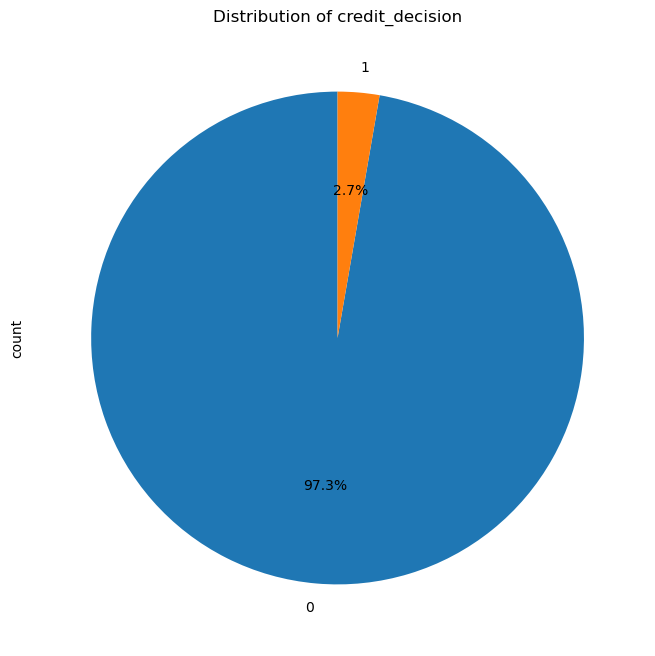

In [26]:
credit_decision_counts = vf['credit_decision'].value_counts()
credit_decision_counts.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8), title='Distribution of credit_decision')

In [27]:
!pip install imbalanced-learn

Percentage of outliers in data_train - Actifs courants: 14.81%
Percentage of outliers in data_train - Disponibilités: 14.63%
Percentage of outliers in data_train - Stocks: 18.90%
Percentage of outliers in data_train - Actifs à long terme: 13.95%
Percentage of outliers in data_train - Passifs courants: 14.10%
Percentage of outliers in data_train - Valeur nette: 13.15%
Percentage of outliers in data_train - Bénéfice net: 13.69%
Percentage of outliers in data_train - Actifs fixes: 20.82%
Percentage of outliers in data_train - Ratio de couverture des intérêts: 16.74%
Percentage of outliers in data_train - Ratio de liquidité: 15.73%
Percentage of outliers in data_train - Ratio de bénéfice exploitation: 10.75%
Percentage of outliers in data_train - Trésorerie nette par action: 18.63%
Percentage of outliers in data_train - Stockholders_equity_to_fixed_assets_ratio: 32.74%
Percentage of outliers in data_train - Current_debt_ratio: 14.97%
Percentage of outliers in data_train - Return_On_Equity_

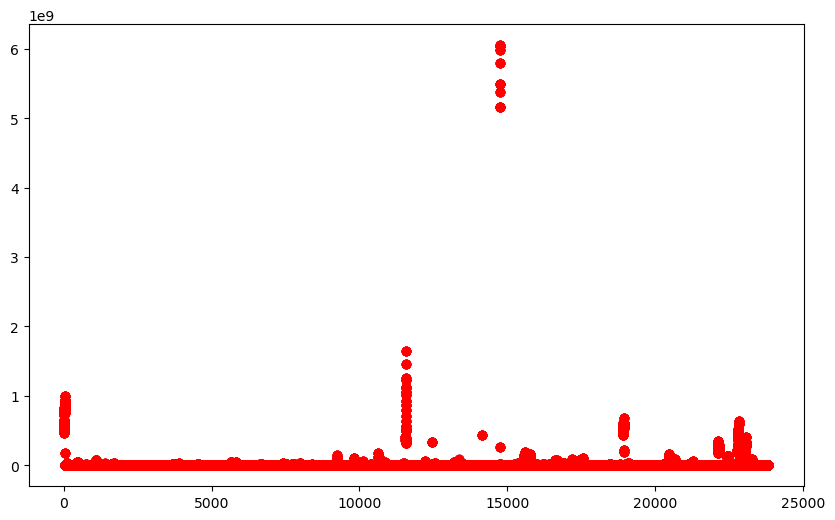

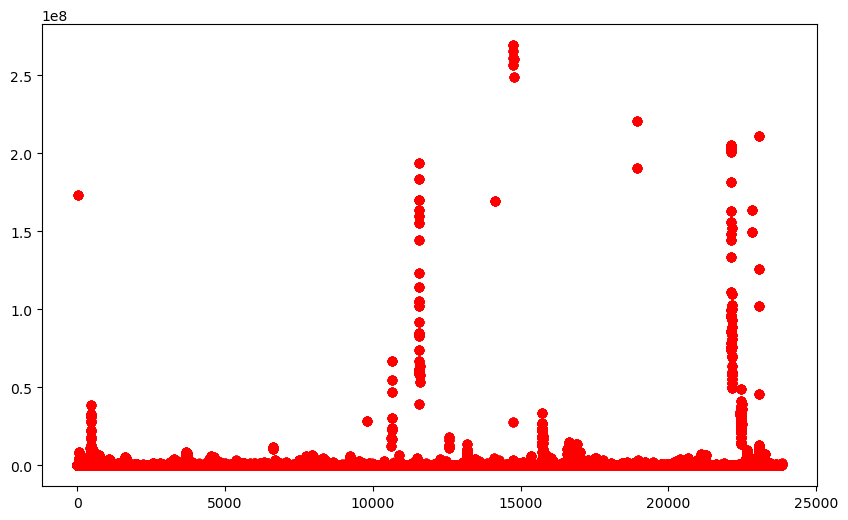

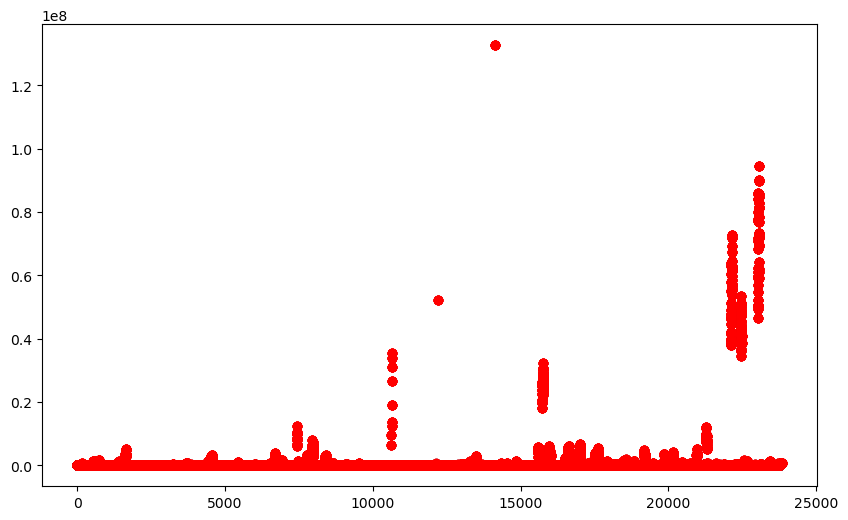

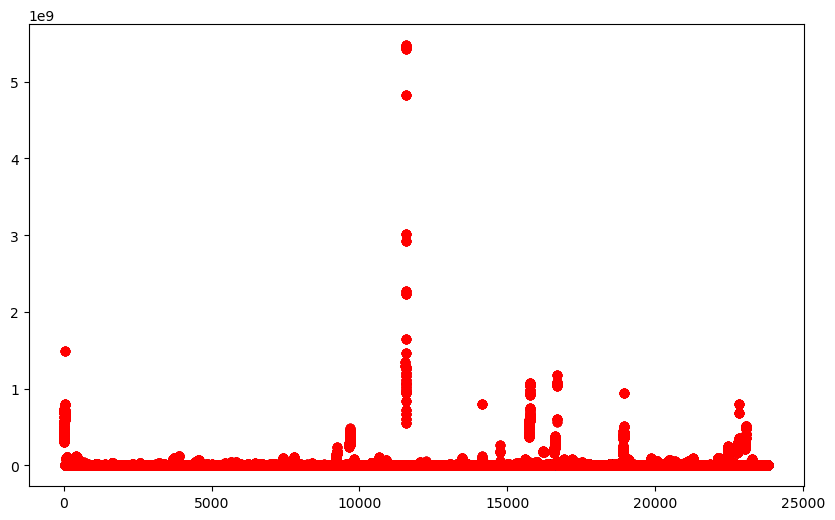

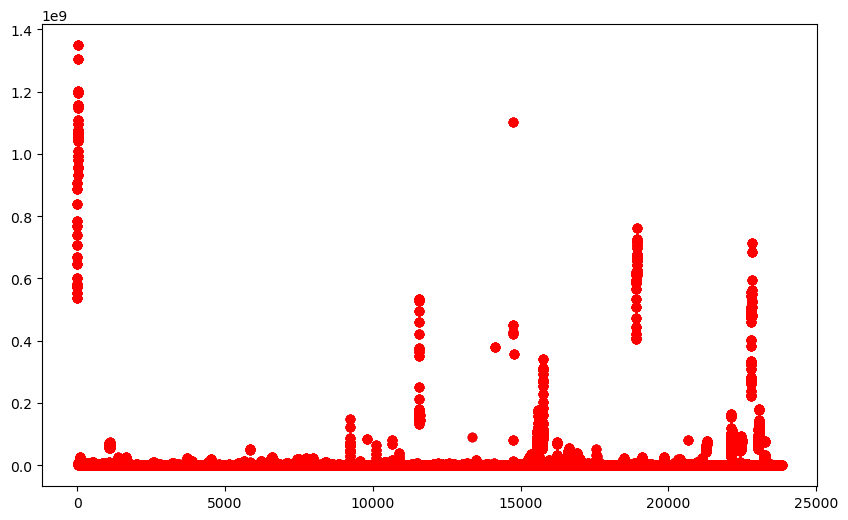

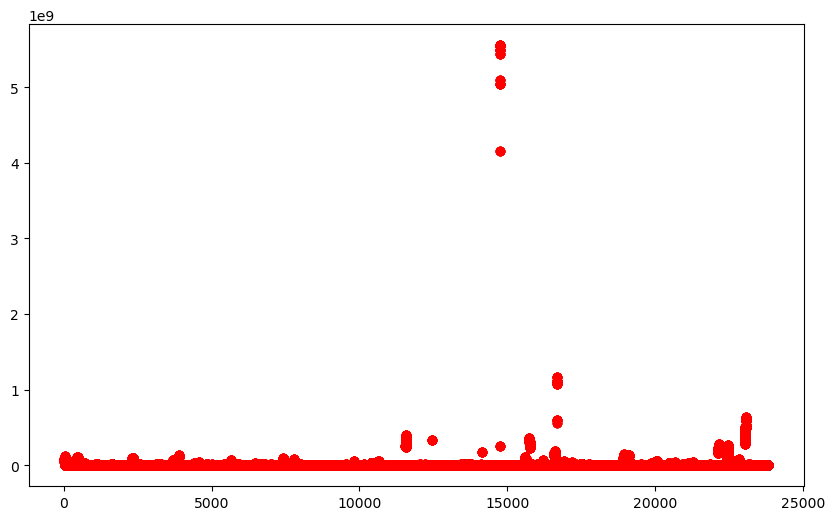

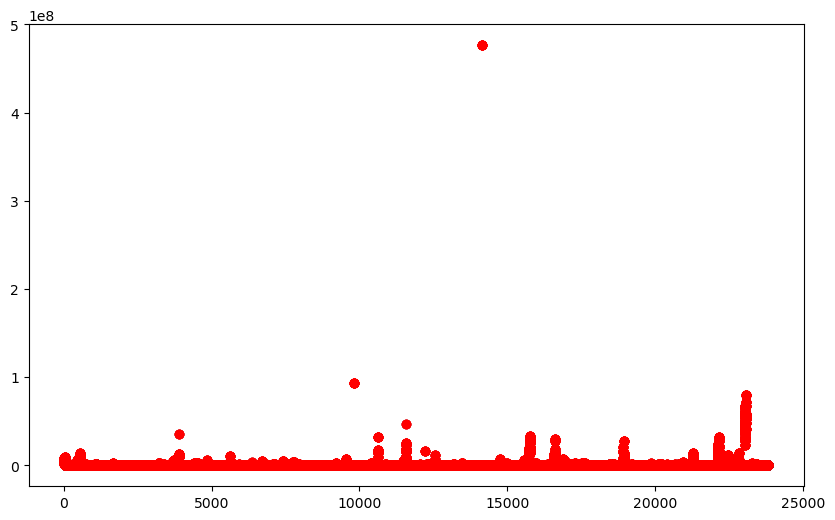

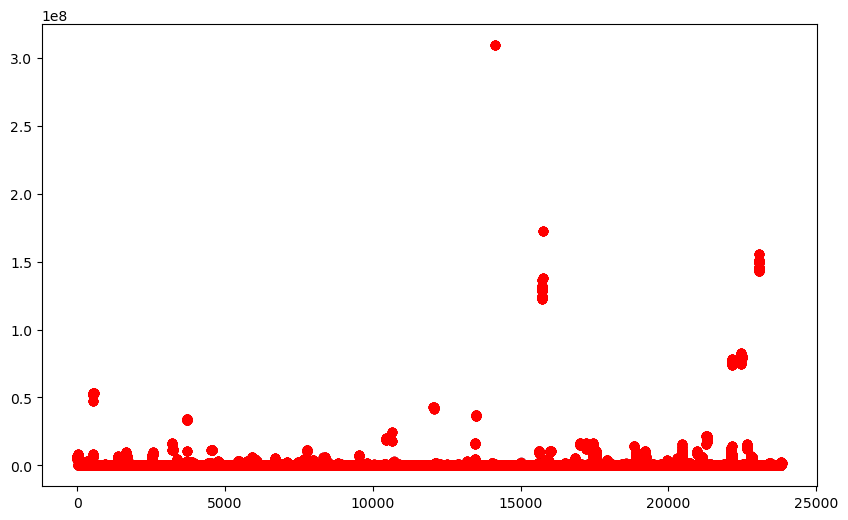

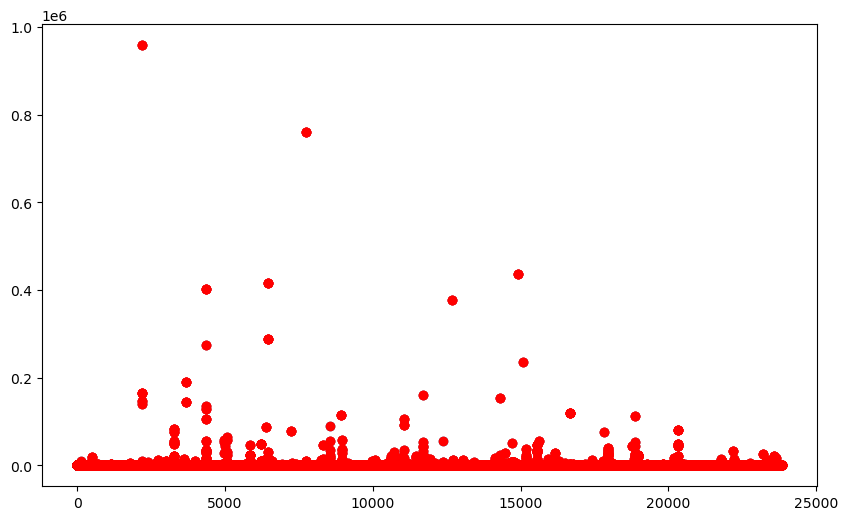

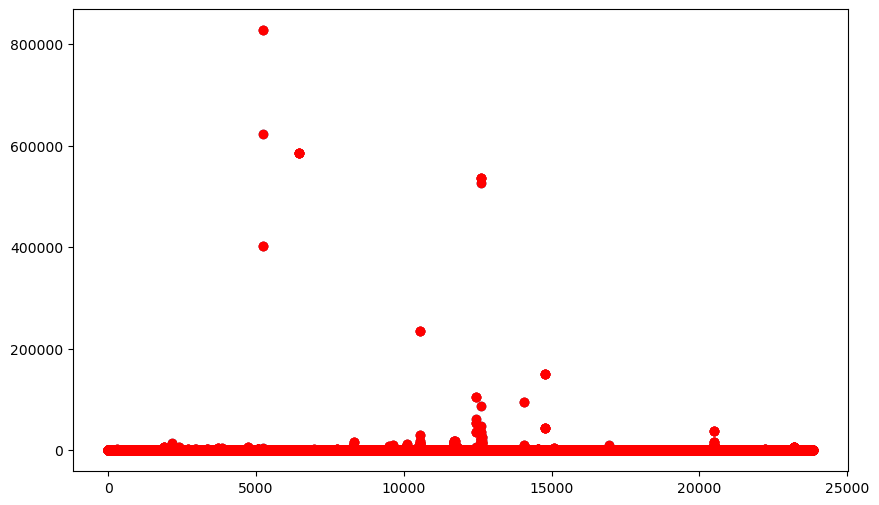

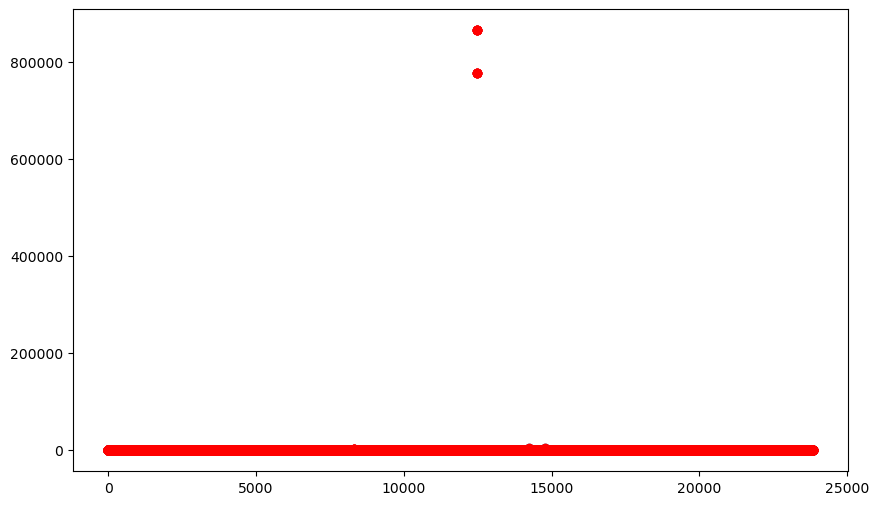

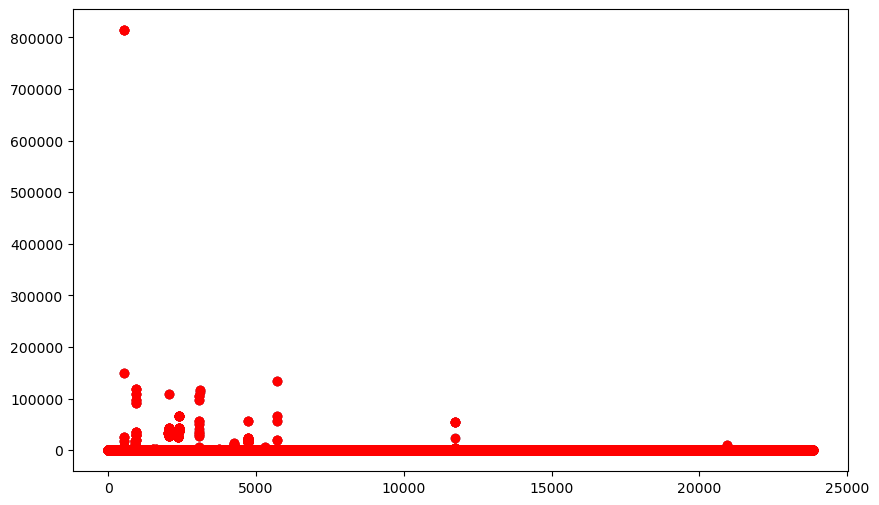

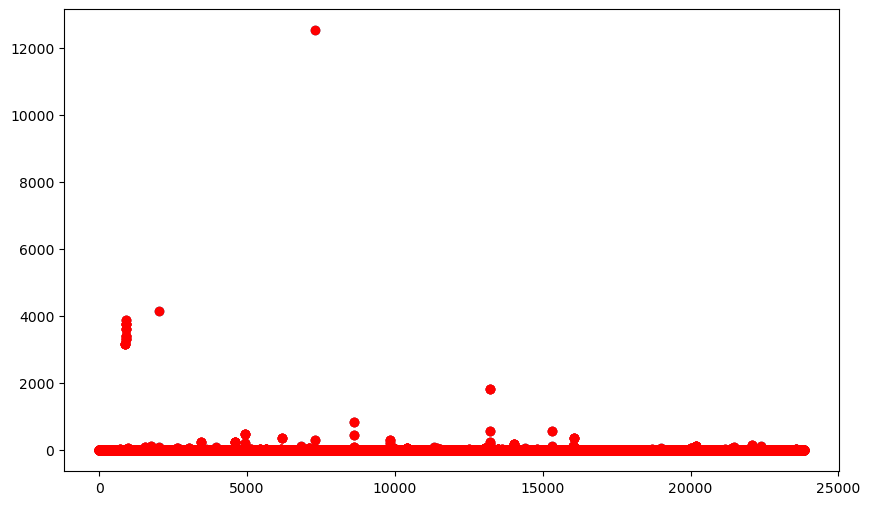

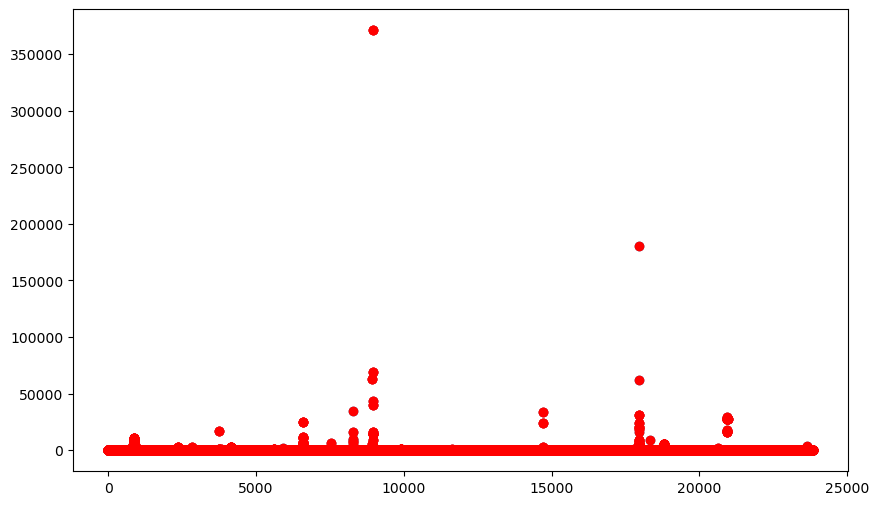

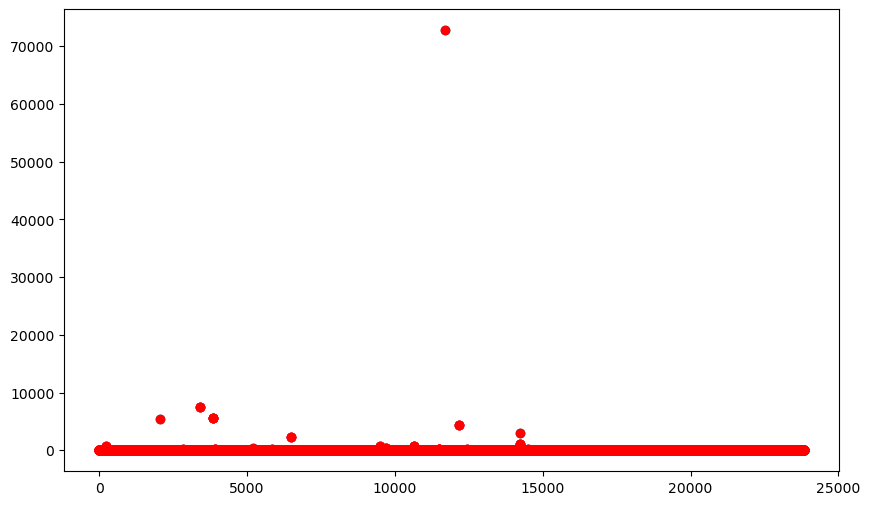

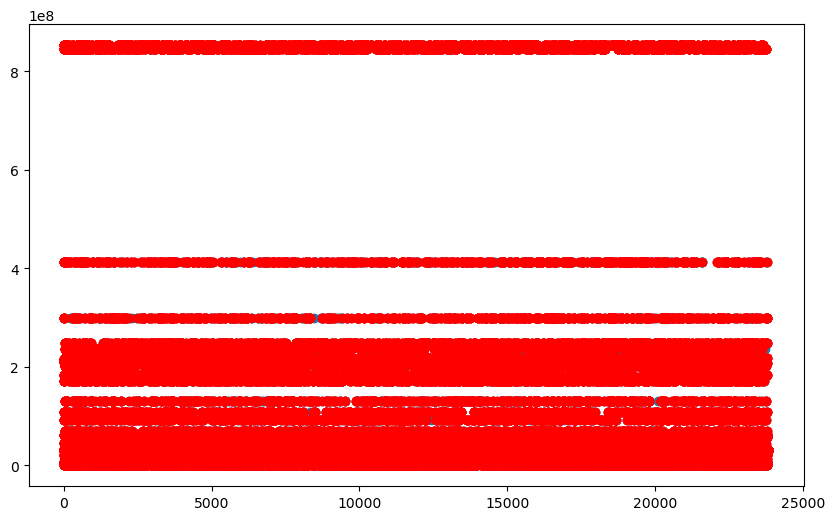

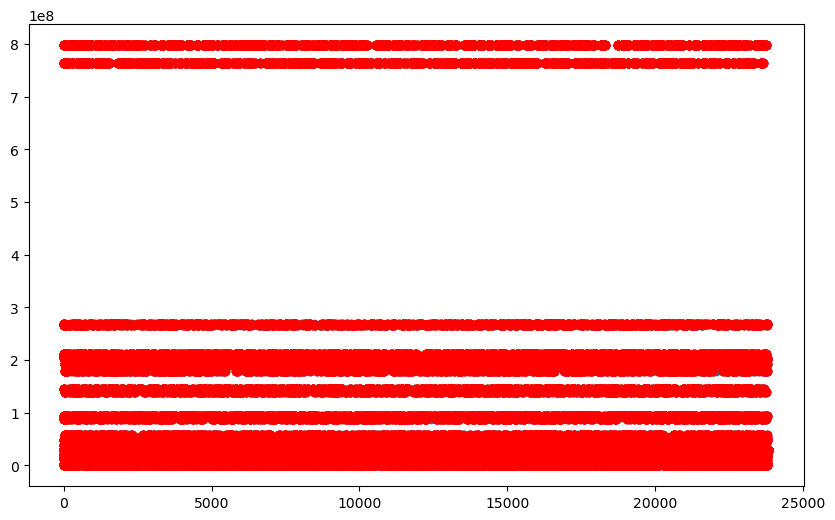

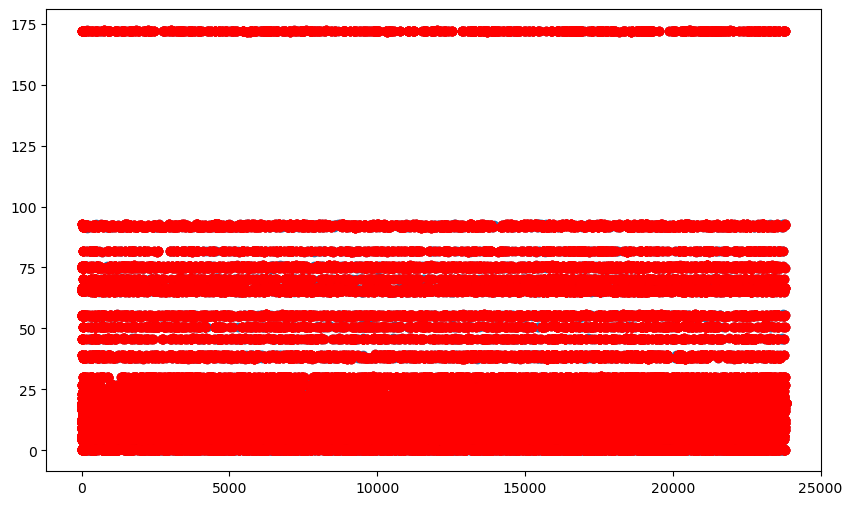

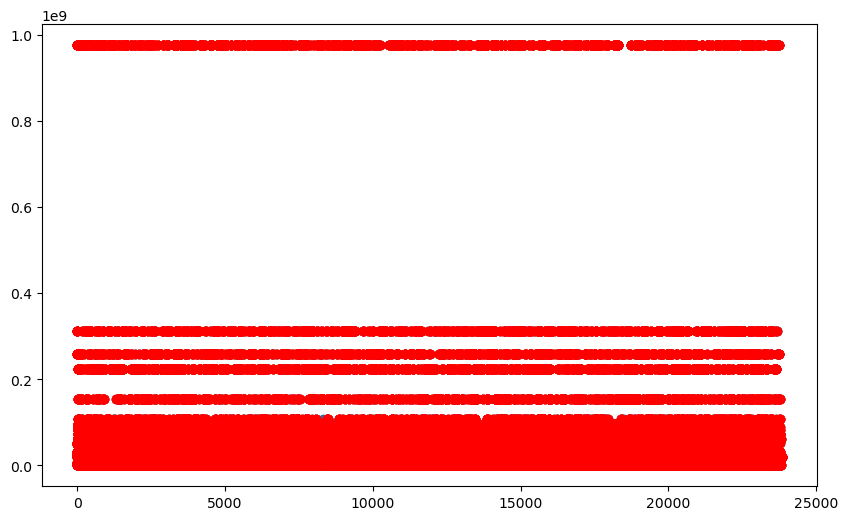

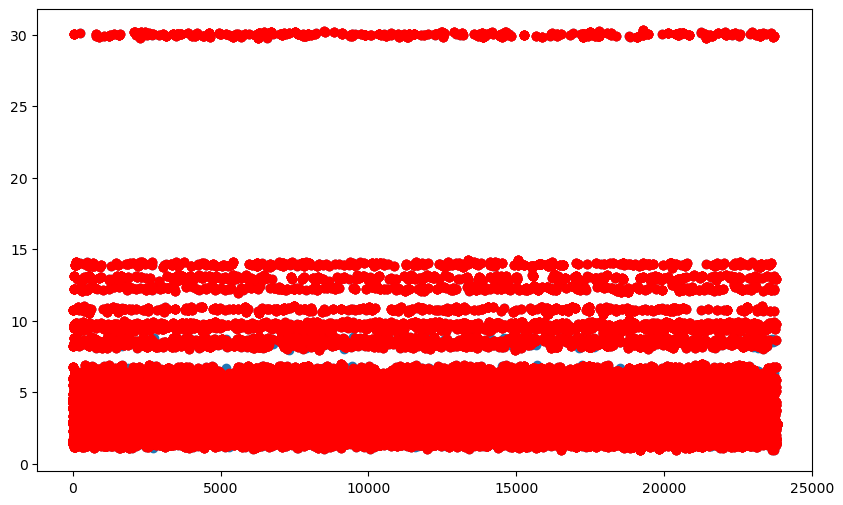

In [28]:
def detect_outliers_iqr(data_train,  threshold=1.5, visualize=True):
    outliers_train = pd.DataFrame()
    

    datasets = {'data_train': data_train}

    for dataset_name, dataset in datasets.items():
        for column in dataset.columns:
            if dataset[column].dtype in [int, float]:
                q1 = dataset[column].quantile(0.25)
                q3 = dataset[column].quantile(0.75)
                iqr = q3 - q1

                lower_bound = q1 - threshold * iqr
                upper_bound = q3 + threshold * iqr

                column_outliers = dataset[(dataset[column] < lower_bound) | (dataset[column] > upper_bound)]
                if dataset_name == 'data_train':
                    outliers_train = pd.concat([outliers_train, column_outliers])
                

                # Calculate percentage of outliers
                total_samples = len(dataset)
                total_outliers = len(column_outliers)
                percentage_outliers = (total_outliers / total_samples) * 100

                print(f"Percentage of outliers in {dataset_name} - {column}: {percentage_outliers:.2f}%")

        if visualize and not column_outliers.empty:
            for column in dataset.columns:
                if dataset[column].dtype in [int, float]:
                    plt.figure(figsize=(10, 6))
                    plt.scatter(dataset.index, dataset[column], label=column)
                    if dataset_name == 'data_train':
                        plt.scatter(outliers_train.index, outliers_train[column], color='red', label='Outliers')
                   
    return outliers_train

data_train_outliers= detect_outliers_iqr(vf)
print("Outliers in vf:")
print(data_train_outliers)


I've decided not to drop outliers from the dataset because it's logical to have variations in revenue and turnover among different companies.

# Encoding 

1/industry

In [29]:
import pandas as pd
industry_mapping = {
    'Telecommunications': '61',
    'Retail': '47',
    'Transport': '49',
    'Automotive': '29',
    'Chemicals': '20',
    'Holding': '65',
    'Oil and gas': '06',
    'Construction': '41',
    'Airline': '51',
    'Mining': '07',
    'Pharmaceuticals': '21',
    'Agroindustry': '01',
    'Information technology': '62',
    'Pulp and paper': '17',
    'Steel': '24',
    'Conglomerate': '66',
    'Healthcare': '86',
    'Energy': '35',
    'Wholesale': '46',
    'Electric utility': '35',
    'Chemistry': '20',
    'Finance': '64',
    'Cement': '23'
}

vf['ISIC_code'] = vf['Industry'].map(industry_mapping)



In [30]:
vf.drop(columns=['Industry'], inplace=True)

In [31]:
vf

Actifs courants  Disponibilités    Stocks  Actifs à long terme  \
0          460670797.0             0.0       0.0          298169181.0   
1          479955357.0             0.0       0.0          306061270.0   
2          512077755.0             0.0       0.0          312982066.0   
3          518716710.0             0.0       0.0          336701838.0   
4          545372613.0             0.0       0.0          333482677.0   
...                ...             ...       ...                  ...   
23829        2071827.0        459310.0  591832.0            5941028.0   
23830        2467704.0        813509.0  660882.0            5815856.0   
23831        2858075.0       1191895.0  643193.0            5856493.0   
23832        2675189.0       1008155.0  609908.0            6202832.0   
23833        2788882.0       1041484.0  657750.0            6493996.0   

       Passifs courants  Valeur nette  Bénéfice net  Actifs fixes  \
0           536607202.0    52172709.0     6371709.0     4568009.0   
1           554643276.0    54276101.0     7131128.0     4575102.0   
2           571192875.0    56279126.0     5136980.0     4707833.0   
3           572481618.0    58148690.0     5974440.0     5062238.0   
4           580836511.0    59817963.0     6351239.0     5114117.0   
...                 ...           ...           ...           ...   
23829         1560116.0     4930863.0      187411.0     2034110.0   
23830         1508687.0     4775975.0      204740.0     1992303.0   
23831         1801311.0     4721980.0      129077.0     1950794.0   
23832         1810919.0     4878595.0      376177.0     1920580.0   
23833         1918806.0     5186852.0      456197.0     1910941.0   

       Ratio de couverture des intérêts  Ratio de liquidité  \
0                            176.443447            1.414144   
1                            142.250987            1.417157   
2                            172.961100            1.444450   
3                            216.438728            1.494229   
4                            138.709756            1.513085   
...                                 ...                 ...   
23829                          9.550313            2.599895   
23830                          1.066317            2.361613   
23831                          0.378786            2.182687   
23832                          4.459962            2.219824   
23833                         14.140048            2.266313   

       Ratio de bénéfice exploitation  credit_decision  \
0                            1.507647                0   
1                            1.504398                0   
2                            1.081095                0   
3                            1.524324                0   
4                            1.345919                0   
...                               ...              ...   
23829                        0.861748                0   
23830                        1.415508                0   
23831                        0.771527                0   
23832                        1.538447                0   
23833                        1.025500                0   

       Trésorerie nette par action  Stockholders_equity_to_fixed_assets_ratio  \
0                         0.041234                                   0.066718   
1                         0.064810                                   0.066965   
2                         0.106330                                   0.066173   
3                         0.136044                                   0.066015   
4                         0.020592                                   0.066109   
...                            ...                                        ...   
23829                     0.001134                                   1.048122   
23830                     0.000741                                   1.048474   
23831                     0.001138                                   1.049404   
23832                     0.002378   

2/pays

In [32]:
 vf['Pays'].unique()

array(['Zimbabwe*', 'Zambie', 'Afrique du Sud', 'Kenya', 'Maroc',
       'Tanzanie', 'Algérie', 'Nigéria', "Côte d'Ivoire", 'Namibie',
       'Togo', 'Ghana', 'Sierra Leone', 'Ethiopie', 'Sénégal', 'Gabon',
       'Egypte', 'Burkina Faso', 'Ouganda', 'Tunisie'], dtype=object)

In [33]:
import pandas as pd
import numpy as np

proportions = vf.groupby('Pays')['credit_decision'].agg(['mean', 'count'])
proportions['non_target'] = 1 - proportions['mean']

proportions['WoE'] = np.log(proportions['mean'] / proportions['non_target'])

proportions.replace([np.inf, -np.inf], np.nan, inplace=True)

proportions['WoE'] *= -1 if proportions['mean'].mean() < 0.5 else 1

woe_mapping = proportions['WoE'].to_dict()

vf['Pays_Encodé_WoE'] = vf['Pays'].map(woe_mapping)


In [34]:
vf

Actifs courants  Disponibilités    Stocks  Actifs à long terme  \
0          460670797.0             0.0       0.0          298169181.0   
1          479955357.0             0.0       0.0          306061270.0   
2          512077755.0             0.0       0.0          312982066.0   
3          518716710.0             0.0       0.0          336701838.0   
4          545372613.0             0.0       0.0          333482677.0   
...                ...             ...       ...                  ...   
23829        2071827.0        459310.0  591832.0            5941028.0   
23830        2467704.0        813509.0  660882.0            5815856.0   
23831        2858075.0       1191895.0  643193.0            5856493.0   
23832        2675189.0       1008155.0  609908.0            6202832.0   
23833        2788882.0       1041484.0  657750.0            6493996.0   

       Passifs courants  Valeur nette  Bénéfice net  Actifs fixes  \
0           536607202.0    52172709.0     6371709.0     4568009.0   
1           554643276.0    54276101.0     7131128.0     4575102.0   
2           571192875.0    56279126.0     5136980.0     4707833.0   
3           572481618.0    58148690.0     5974440.0     5062238.0   
4           580836511.0    59817963.0     6351239.0     5114117.0   
...                 ...           ...           ...           ...   
23829         1560116.0     4930863.0      187411.0     2034110.0   
23830         1508687.0     4775975.0      204740.0     1992303.0   
23831         1801311.0     4721980.0      129077.0     1950794.0   
23832         1810919.0     4878595.0      376177.0     1920580.0   
23833         1918806.0     5186852.0      456197.0     1910941.0   

       Ratio de couverture des intérêts  Ratio de liquidité  \
0                            176.443447            1.414144   
1                            142.250987            1.417157   
2                            172.961100            1.444450   
3                            216.438728            1.494229   
4                            138.709756            1.513085   
...                                 ...                 ...   
23829                          9.550313            2.599895   
23830                          1.066317            2.361613   
23831                          0.378786            2.182687   
23832                          4.459962            2.219824   
23833                         14.140048            2.266313   

       Ratio de bénéfice exploitation  credit_decision  \
0                            1.507647                0   
1                            1.504398                0   
2                            1.081095                0   
3                            1.524324                0   
4                            1.345919                0   
...                               ...              ...   
23829                        0.861748                0   
23830                        1.415508                0   
23831                        0.771527                0   
23832                        1.538447                0   
23833                        1.025500                0   

       Trésorerie nette par action  Stockholders_equity_to_fixed_assets_ratio  \
0                         0.041234                                   0.066718   
1                         0.064810                                   0.066965   
2                         0.106330                                   0.066173   
3                         0.136044                                   0.066015   
4                         0.020592                                   0.066109   
...                            ...                                        ...   
23829                     0.001134                                   1.048122   
23830                     0.000741                                   1.048474   
23831                     0.001138                                   1.049404   
23832                     0.002378   

3/nombre d'employés

In [35]:
 vf['Number of Employees'].unique()

array(['17,000', '49,000', '12,000', '38,000', '22,000', '8,300',
       '71,000', '34,000', '20,000', '99,000', '2,150,000', '84,000',
       '3,000', '460,000', '30,053', '1,500,000', '53,000', '75,000',
       '107,000', '192,000', '73,000', '168,000', '402,000', '8,000',
       '166,000', '30,000', '100,000', '150,000', '1,000', '50,000',
       '72,000', '14,000', '27,000', '87,000', '23,000', '13,000',
       '78,000', '24,000', '200,000', '167,000', '50', '352,600',
       '43,000', '26,000', '95,000', '28,000', '256,000', '25,000',
       '350,000', '1,730,000', '446,000', '53,557', '62,600', '45,000',
       '99,869', '69,000', '256,981', '287,000', '92,000', '101,187',
       '10,000', '289,973', '16,000', '456,000', '1,100', '110,441',
       '48,000', '18,000', '2,300,000', '31,000', '11,700', '142,942',
       '7,000', '9,000', '459,000', '169,000', '367,700', '476,000',
       '267,000', '300,000', '40,000', '500', '210,000', '434,000',
       '80,000', '70,000', '444,000

In [36]:
vf

Actifs courants  Disponibilités    Stocks  Actifs à long terme  \
0          460670797.0             0.0       0.0          298169181.0   
1          479955357.0             0.0       0.0          306061270.0   
2          512077755.0             0.0       0.0          312982066.0   
3          518716710.0             0.0       0.0          336701838.0   
4          545372613.0             0.0       0.0          333482677.0   
...                ...             ...       ...                  ...   
23829        2071827.0        459310.0  591832.0            5941028.0   
23830        2467704.0        813509.0  660882.0            5815856.0   
23831        2858075.0       1191895.0  643193.0            5856493.0   
23832        2675189.0       1008155.0  609908.0            6202832.0   
23833        2788882.0       1041484.0  657750.0            6493996.0   

       Passifs courants  Valeur nette  Bénéfice net  Actifs fixes  \
0           536607202.0    52172709.0     6371709.0     4568009.0   
1           554643276.0    54276101.0     7131128.0     4575102.0   
2           571192875.0    56279126.0     5136980.0     4707833.0   
3           572481618.0    58148690.0     5974440.0     5062238.0   
4           580836511.0    59817963.0     6351239.0     5114117.0   
...                 ...           ...           ...           ...   
23829         1560116.0     4930863.0      187411.0     2034110.0   
23830         1508687.0     4775975.0      204740.0     1992303.0   
23831         1801311.0     4721980.0      129077.0     1950794.0   
23832         1810919.0     4878595.0      376177.0     1920580.0   
23833         1918806.0     5186852.0      456197.0     1910941.0   

       Ratio de couverture des intérêts  Ratio de liquidité  \
0                            176.443447            1.414144   
1                            142.250987            1.417157   
2                            172.961100            1.444450   
3                            216.438728            1.494229   
4                            138.709756            1.513085   
...                                 ...                 ...   
23829                          9.550313            2.599895   
23830                          1.066317            2.361613   
23831                          0.378786            2.182687   
23832                          4.459962            2.219824   
23833                         14.140048            2.266313   

       Ratio de bénéfice exploitation  credit_decision  \
0                            1.507647                0   
1                            1.504398                0   
2                            1.081095                0   
3                            1.524324                0   
4                            1.345919                0   
...                               ...              ...   
23829                        0.861748                0   
23830                        1.415508                0   
23831                        0.771527                0   
23832                        1.538447                0   
23833                        1.025500                0   

       Trésorerie nette par action  Stockholders_equity_to_fixed_assets_ratio  \
0                         0.041234                                   0.066718   
1                         0.064810                                   0.066965   
2                         0.106330                                   0.066173   
3                         0.136044                                   0.066015   
4                         0.020592                                   0.066109   
...                            ...                                        ...   
23829                     0.001134                                   1.048122   
23830                     0.000741                                   1.048474   
23831                     0.001138                                   1.049404   
23832                     0.002378   

In [37]:
import pandas as pd

def clean_and_convert(value):
    if isinstance(value, str):
        value = value.replace(',', '')
        try:
            return float(value)
        except ValueError:
            return value  
    else:
        return value

vf['Number of Employees'] = vf['Number of Employees'].apply(clean_and_convert)

print(vf)


       Actifs courants  Disponibilités    Stocks  Actifs à long terme  \
0          460670797.0             0.0       0.0          298169181.0   
1          479955357.0             0.0       0.0          306061270.0   
2          512077755.0             0.0       0.0          312982066.0   
3          518716710.0             0.0       0.0          336701838.0   
4          545372613.0             0.0       0.0          333482677.0   
...                ...             ...       ...                  ...   
23829        2071827.0        459310.0  591832.0            5941028.0   
23830        2467704.0        813509.0  660882.0            5815856.0   
23831        2858075.0       1191895.0  643193.0            5856493.0   
23832        2675189.0       1008155.0  609908.0            6202832.0   
23833        2788882.0       1041484.0  657750.0            6493996.0   

       Passifs courants  Valeur nette  Bénéfice net  Actifs fixes  \
0           536607202.0    52172709.0     6371709.0   

In [38]:
vf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23834 entries, 0 to 23833
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Actifs courants                            23834 non-null  float64
 1   Disponibilités                             23834 non-null  float64
 2   Stocks                                     23834 non-null  float64
 3   Actifs à long terme                        23834 non-null  float64
 4   Passifs courants                           23834 non-null  float64
 5   Valeur nette                               23834 non-null  float64
 6   Bénéfice net                               23834 non-null  float64
 7   Actifs fixes                               23834 non-null  float64
 8   Ratio de couverture des intérêts           23834 non-null  float64
 9   Ratio de liquidité                         23834 non-null  float64
 10  Ratio de bénéfice expl

In [39]:
vf['Evolution 2018-2019']

0        65.164900
1        12.710444
2        55.555293
3        66.753962
4        18.239523
           ...    
23829    19.564606
23830    19.564606
23831    19.564606
23832    19.564606
23833    19.564606
Name: Evolution 2018-2019, Length: 23834, dtype: float64

In [40]:
vf['Evolution 2018-2019'] = vf['Evolution 2018-2019'] / 100


In [41]:
vf["Chiffre d'affaires 2018"]

0        1.264100e+07
1        2.763000e+06
2        2.655870e+08
3        2.115700e+07
4        1.448230e+08
             ...     
23829    2.968800e+07
23830    2.968800e+07
23831    2.968800e+07
23832    2.968800e+07
23833    2.968800e+07
Name: Chiffre d'affaires 2018, Length: 23834, dtype: float64

feature engineering 

In [42]:
Chiffre_daffaires_2018_unique = vf["Chiffre d'affaires 2018"].nunique()
Chiffre_daffaires_2019_unique = vf["Chiffre d'affaires 2019"].nunique()
print("Number of unique values for 'Chiffre d'affaires 2018':", Chiffre_daffaires_2018_unique)
print("Number of unique values for 'Chiffre d'affaires 2019':", Chiffre_daffaires_2019_unique)


Number of unique values for 'Chiffre d'affaires 2018': 22873
Number of unique values for 'Chiffre d'affaires 2019': 22873


### Based on the correlation matrix and financial analysis, we have decided to drop the 2018 turnover feature to eliminate redundancy.

In [43]:
vf.drop(columns=["Chiffre d'affaires 2018"], inplace=True)

In [44]:
vf.drop(columns=["Pays"], inplace=True)

dealing with "Chiffre d'affaires 2019"

In [45]:
data=vf["Chiffre d'affaires 2019"].unique()

In [46]:
vf['Revenue(US$)'] = vf['Revenue(US$ billions)'] * 1e9

vf['Revenue(US$)']


0        6.734412e+09
1        4.863838e+09
2        2.775989e+09
3        1.377835e+09
4        1.426221e+09
             ...     
23829    2.755499e+09
23830    2.755499e+09
23831    2.755499e+09
23832    2.755499e+09
23833    2.755499e+09
Name: Revenue(US$), Length: 23834, dtype: float64

In [47]:
vf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23834 entries, 0 to 23833
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Actifs courants                            23834 non-null  float64
 1   Disponibilités                             23834 non-null  float64
 2   Stocks                                     23834 non-null  float64
 3   Actifs à long terme                        23834 non-null  float64
 4   Passifs courants                           23834 non-null  float64
 5   Valeur nette                               23834 non-null  float64
 6   Bénéfice net                               23834 non-null  float64
 7   Actifs fixes                               23834 non-null  float64
 8   Ratio de couverture des intérêts           23834 non-null  float64
 9   Ratio de liquidité                         23834 non-null  float64
 10  Ratio de bénéfice expl

In [48]:
vf

Actifs courants  Disponibilités    Stocks  Actifs à long terme  \
0          460670797.0             0.0       0.0          298169181.0   
1          479955357.0             0.0       0.0          306061270.0   
2          512077755.0             0.0       0.0          312982066.0   
3          518716710.0             0.0       0.0          336701838.0   
4          545372613.0             0.0       0.0          333482677.0   
...                ...             ...       ...                  ...   
23829        2071827.0        459310.0  591832.0            5941028.0   
23830        2467704.0        813509.0  660882.0            5815856.0   
23831        2858075.0       1191895.0  643193.0            5856493.0   
23832        2675189.0       1008155.0  609908.0            6202832.0   
23833        2788882.0       1041484.0  657750.0            6493996.0   

       Passifs courants  Valeur nette  Bénéfice net  Actifs fixes  \
0           536607202.0    52172709.0     6371709.0     4568009.0   
1           554643276.0    54276101.0     7131128.0     4575102.0   
2           571192875.0    56279126.0     5136980.0     4707833.0   
3           572481618.0    58148690.0     5974440.0     5062238.0   
4           580836511.0    59817963.0     6351239.0     5114117.0   
...                 ...           ...           ...           ...   
23829         1560116.0     4930863.0      187411.0     2034110.0   
23830         1508687.0     4775975.0      204740.0     1992303.0   
23831         1801311.0     4721980.0      129077.0     1950794.0   
23832         1810919.0     4878595.0      376177.0     1920580.0   
23833         1918806.0     5186852.0      456197.0     1910941.0   

       Ratio de couverture des intérêts  Ratio de liquidité  \
0                            176.443447            1.414144   
1                            142.250987            1.417157   
2                            172.961100            1.444450   
3                            216.438728            1.494229   
4                            138.709756            1.513085   
...                                 ...                 ...   
23829                          9.550313            2.599895   
23830                          1.066317            2.361613   
23831                          0.378786            2.182687   
23832                          4.459962            2.219824   
23833                         14.140048            2.266313   

       Ratio de bénéfice exploitation  credit_decision  \
0                            1.507647                0   
1                            1.504398                0   
2                            1.081095                0   
3                            1.524324                0   
4                            1.345919                0   
...                               ...              ...   
23829                        0.861748                0   
23830                        1.415508                0   
23831                        0.771527                0   
23832                        1.538447                0   
23833                        1.025500                0   

       Trésorerie nette par action  Stockholders_equity_to_fixed_assets_ratio  \
0                         0.041234                                   0.066718   
1                         0.064810                                   0.066965   
2                         0.106330                                   0.066173   
3                         0.136044                                   0.066015   
4                         0.020592                                   0.066109   
...                            ...                                        ...   
23829                     0.001134                                   1.048122   
23830                     0.000741                                   1.048474   
23831                     0.001138                                   1.049404   
23832                     0.002378   

In [49]:
vf["ISIC_code"] = vf["ISIC_code"].astype(int)


In [50]:
vf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23834 entries, 0 to 23833
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Actifs courants                            23834 non-null  float64
 1   Disponibilités                             23834 non-null  float64
 2   Stocks                                     23834 non-null  float64
 3   Actifs à long terme                        23834 non-null  float64
 4   Passifs courants                           23834 non-null  float64
 5   Valeur nette                               23834 non-null  float64
 6   Bénéfice net                               23834 non-null  float64
 7   Actifs fixes                               23834 non-null  float64
 8   Ratio de couverture des intérêts           23834 non-null  float64
 9   Ratio de liquidité                         23834 non-null  float64
 10  Ratio de bénéfice expl

In [51]:
## encoding the number of employees 

In [52]:
unique_values = vf["Number of Employees"].unique()




In [53]:
def get_interval(value):
    if value < 10000:
        return 'Low'
    elif value < 50000:
        return 'Medium'
    elif value < 100000:
        return 'High'
    else:
        return 'Very High'

encoded_values = {}

for value in unique_values:
    encoded_values[value] = get_interval(value)

vf['Encoded_Number_of_Employees'] = vf['Number of Employees'].map(encoded_values)


In [54]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High', 'Very High']])

encoded_data = vf['Encoded_Number_of_Employees'].values.reshape(-1, 1)

vf['Ordinal_Encoded_Number_of_Employees'] = encoder.fit_transform(encoded_data)

print(vf)


       Actifs courants  Disponibilités    Stocks  Actifs à long terme  \
0          460670797.0             0.0       0.0          298169181.0   
1          479955357.0             0.0       0.0          306061270.0   
2          512077755.0             0.0       0.0          312982066.0   
3          518716710.0             0.0       0.0          336701838.0   
4          545372613.0             0.0       0.0          333482677.0   
...                ...             ...       ...                  ...   
23829        2071827.0        459310.0  591832.0            5941028.0   
23830        2467704.0        813509.0  660882.0            5815856.0   
23831        2858075.0       1191895.0  643193.0            5856493.0   
23832        2675189.0       1008155.0  609908.0            6202832.0   
23833        2788882.0       1041484.0  657750.0            6493996.0   

       Passifs courants  Valeur nette  Bénéfice net  Actifs fixes  \
0           536607202.0    52172709.0     6371709.0   

In [55]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High', 'Very High']])

encoded_data = vf['Encoded_Number_of_Employees'].values.reshape(-1, 1)

vf['Encoded_Number_of_Employees'] = encoder.fit_transform(encoded_data)




In [56]:
vf

Actifs courants  Disponibilités    Stocks  Actifs à long terme  \
0          460670797.0             0.0       0.0          298169181.0   
1          479955357.0             0.0       0.0          306061270.0   
2          512077755.0             0.0       0.0          312982066.0   
3          518716710.0             0.0       0.0          336701838.0   
4          545372613.0             0.0       0.0          333482677.0   
...                ...             ...       ...                  ...   
23829        2071827.0        459310.0  591832.0            5941028.0   
23830        2467704.0        813509.0  660882.0            5815856.0   
23831        2858075.0       1191895.0  643193.0            5856493.0   
23832        2675189.0       1008155.0  609908.0            6202832.0   
23833        2788882.0       1041484.0  657750.0            6493996.0   

       Passifs courants  Valeur nette  Bénéfice net  Actifs fixes  \
0           536607202.0    52172709.0     6371709.0     4568009.0   
1           554643276.0    54276101.0     7131128.0     4575102.0   
2           571192875.0    56279126.0     5136980.0     4707833.0   
3           572481618.0    58148690.0     5974440.0     5062238.0   
4           580836511.0    59817963.0     6351239.0     5114117.0   
...                 ...           ...           ...           ...   
23829         1560116.0     4930863.0      187411.0     2034110.0   
23830         1508687.0     4775975.0      204740.0     1992303.0   
23831         1801311.0     4721980.0      129077.0     1950794.0   
23832         1810919.0     4878595.0      376177.0     1920580.0   
23833         1918806.0     5186852.0      456197.0     1910941.0   

       Ratio de couverture des intérêts  Ratio de liquidité  \
0                            176.443447            1.414144   
1                            142.250987            1.417157   
2                            172.961100            1.444450   
3                            216.438728            1.494229   
4                            138.709756            1.513085   
...                                 ...                 ...   
23829                          9.550313            2.599895   
23830                          1.066317            2.361613   
23831                          0.378786            2.182687   
23832                          4.459962            2.219824   
23833                         14.140048            2.266313   

       Ratio de bénéfice exploitation  credit_decision  \
0                            1.507647                0   
1                            1.504398                0   
2                            1.081095                0   
3                            1.524324                0   
4                            1.345919                0   
...                               ...              ...   
23829                        0.861748                0   
23830                        1.415508                0   
23831                        0.771527                0   
23832                        1.538447                0   
23833                        1.025500                0   

       Trésorerie nette par action  Stockholders_equity_to_fixed_assets_ratio  \
0                         0.041234                                   0.066718   
1                         0.064810                                   0.066965   
2                         0.106330                                   0.066173   
3                         0.136044                                   0.066015   
4                         0.020592                                   0.066109   
...                            ...                                        ...   
23829                     0.001134                                   1.048122   
23830                     0.000741                                   1.048474   
23831                     0.001138                                   1.049404   
23832                     0.002378   

In [57]:
vf.drop(columns=["Number of Employees"], inplace=True)

## Standardization 

In [58]:
vf.columns

Index(['Actifs courants', 'Disponibilités', 'Stocks', 'Actifs à long terme',
       'Passifs courants', 'Valeur nette', 'Bénéfice net', 'Actifs fixes',
       'Ratio de couverture des intérêts', 'Ratio de liquidité',
       'Ratio de bénéfice exploitation', 'credit_decision',
       'Trésorerie nette par action',
       'Stockholders_equity_to_fixed_assets_ratio', 'Current_debt_ratio',
       'Return_On_Equity_ROE', 'Chiffre d'affaires 2019',
       'Evolution 2018-2019', 'Fonds propres 2019', 'Revenue(US$ billions)',
       'ISIC_code', 'Pays_Encodé_WoE', 'Revenue(US$)',
       'Encoded_Number_of_Employees', 'Ordinal_Encoded_Number_of_Employees'],
      dtype='object')

In [59]:
from sklearn.preprocessing import StandardScaler

features_to_standardize = ['Actifs courants', 'Disponibilités', 'Stocks', 'Actifs à long terme',
                           'Passifs courants', 'Valeur nette', 'Bénéfice net', 'Actifs fixes',
                           'Ratio de couverture des intérêts', 'Ratio de liquidité',
                           'Ratio de bénéfice exploitation', 'Trésorerie nette par action',
                           'Stockholders_equity_to_fixed_assets_ratio', 'Current_debt_ratio',
                           'Return_On_Equity_ROE', 'Chiffre d\'affaires 2019',
                           'Evolution 2018-2019', 'Fonds propres 2019', 'Revenue(US$ billions)',
                           'Revenue(US$)', 'Encoded_Number_of_Employees']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
vf[features_to_standardize] = scaler.fit_transform(vf[features_to_standardize])

print(vf)


       Actifs courants  Disponibilités    Stocks  Actifs à long terme  \
0             3.429827       -0.090849 -0.108979             2.596076   
1             3.576448       -0.090849 -0.108979             2.667786   
2             3.820675       -0.090849 -0.108979             2.730670   
3             3.871151       -0.090849 -0.108979             2.946194   
4             4.073815       -0.090849 -0.108979             2.916944   
...                ...             ...       ...                  ...   
23829        -0.056902       -0.035800  0.026348            -0.059187   
23830        -0.053892        0.006652  0.042136            -0.060324   
23831        -0.050924        0.052003  0.038092            -0.059955   
23832        -0.052315        0.029981  0.030481            -0.056808   
23833        -0.051450        0.033976  0.041420            -0.054163   

       Passifs courants  Valeur nette  Bénéfice net  Actifs fixes  \
0             10.204234      0.367349      1.470940   

In [60]:
vf

Actifs courants  Disponibilités    Stocks  Actifs à long terme  \
0             3.429827       -0.090849 -0.108979             2.596076   
1             3.576448       -0.090849 -0.108979             2.667786   
2             3.820675       -0.090849 -0.108979             2.730670   
3             3.871151       -0.090849 -0.108979             2.946194   
4             4.073815       -0.090849 -0.108979             2.916944   
...                ...             ...       ...                  ...   
23829        -0.056902       -0.035800  0.026348            -0.059187   
23830        -0.053892        0.006652  0.042136            -0.060324   
23831        -0.050924        0.052003  0.038092            -0.059955   
23832        -0.052315        0.029981  0.030481            -0.056808   
23833        -0.051450        0.033976  0.041420            -0.054163   

       Passifs courants  Valeur nette  Bénéfice net  Actifs fixes  \
0             10.204234      0.367349      1.470940      0.742279   
1             10.550978      0.385104      1.657520      0.743566   
2             10.869144      0.402011      1.167583      0.767649   
3             10.893920      0.417793      1.373336      0.831951   
4             11.054543      0.431883      1.465911      0.841364   
...                 ...           ...           ...           ...   
23829         -0.082047     -0.031426     -0.048463      0.282533   
23830         -0.083036     -0.032734     -0.044205      0.274948   
23831         -0.077410     -0.033189     -0.062795      0.267417   
23832         -0.077225     -0.031867     -0.002085      0.261935   
23833         -0.075151     -0.029265      0.017574      0.260186   

       Ratio de couverture des intérêts  Ratio de liquidité  \
0                             -0.032980           -0.027232   
1                             -0.036121           -0.027232   
2                             -0.033300           -0.027229   
3                             -0.029305           -0.027224   
4                             -0.036446           -0.027222   
...                                 ...                 ...   
23829                         -0.048313           -0.027111   
23830                         -0.049092           -0.027135   
23831                         -0.049155           -0.027153   
23832                         -0.048780           -0.027150   
23833                         -0.047891           -0.027145   

       Ratio de bénéfice exploitation  credit_decision  \
0                           -0.009385                0   
1                           -0.009385                0   
2                           -0.009441                0   
3                           -0.009383                0   
4                           -0.009406                0   
...                               ...              ...   
23829                       -0.009471                0   
23830                       -0.009397                0   
23831                       -0.009483                0   
23832                       -0.009381                0   
23833                       -0.009449                0   

       Trésorerie nette par action  Stockholders_equity_to_fixed_assets_ratio  \
0                        -0.035450                                  -0.033249   
1                        -0.035447                                  -0.033247   
2                        -0.035440                                  -0.033255   
3                        -0.035435                                  -0.033256   
4                        -0.035454                                  -0.033255   
...                            ...                                        ...   
23829                    -0.035457                                  -0.023778   
23830                    -0.035457                                  -0.023774   
23831                    -0.035457                                  -0.023766   
23832                    -0.035457   

In [61]:
target = vf.credit_decision
vf =vf.drop(columns=['credit_decision'],axis=1)
target

0        0
1        0
2        0
3        0
4        0
        ..
23829    0
23830    0
23831    0
23832    0
23833    0
Name: credit_decision, Length: 23834, dtype: int64

In [62]:
from imblearn.over_sampling import ADASYN
import pandas as pd

sampling_strategy = 0.6 
adasyn = ADASYN(sampling_strategy=sampling_strategy, random_state=23)

vf_over, target_over = adasyn.fit_resample(vf, target)

vf_over_df = pd.DataFrame(vf_over, columns=vf.columns)
target_over_df = pd.DataFrame(target_over, columns=[target.name])

In [63]:
print("Nombre d'échantillons de la classe majoritaire (0) après suréchantillonnage :", target_over_df[target_over_df[target.name] == 0].shape[0])
print("Nombre d'échantillons de la classe minoritaire (1) après suréchantillonnage :", target_over_df[target_over_df[target.name] == 1].shape[0])

Nombre d'échantillons de la classe majoritaire (0) après suréchantillonnage : 23183
Nombre d'échantillons de la classe minoritaire (1) après suréchantillonnage : 13659


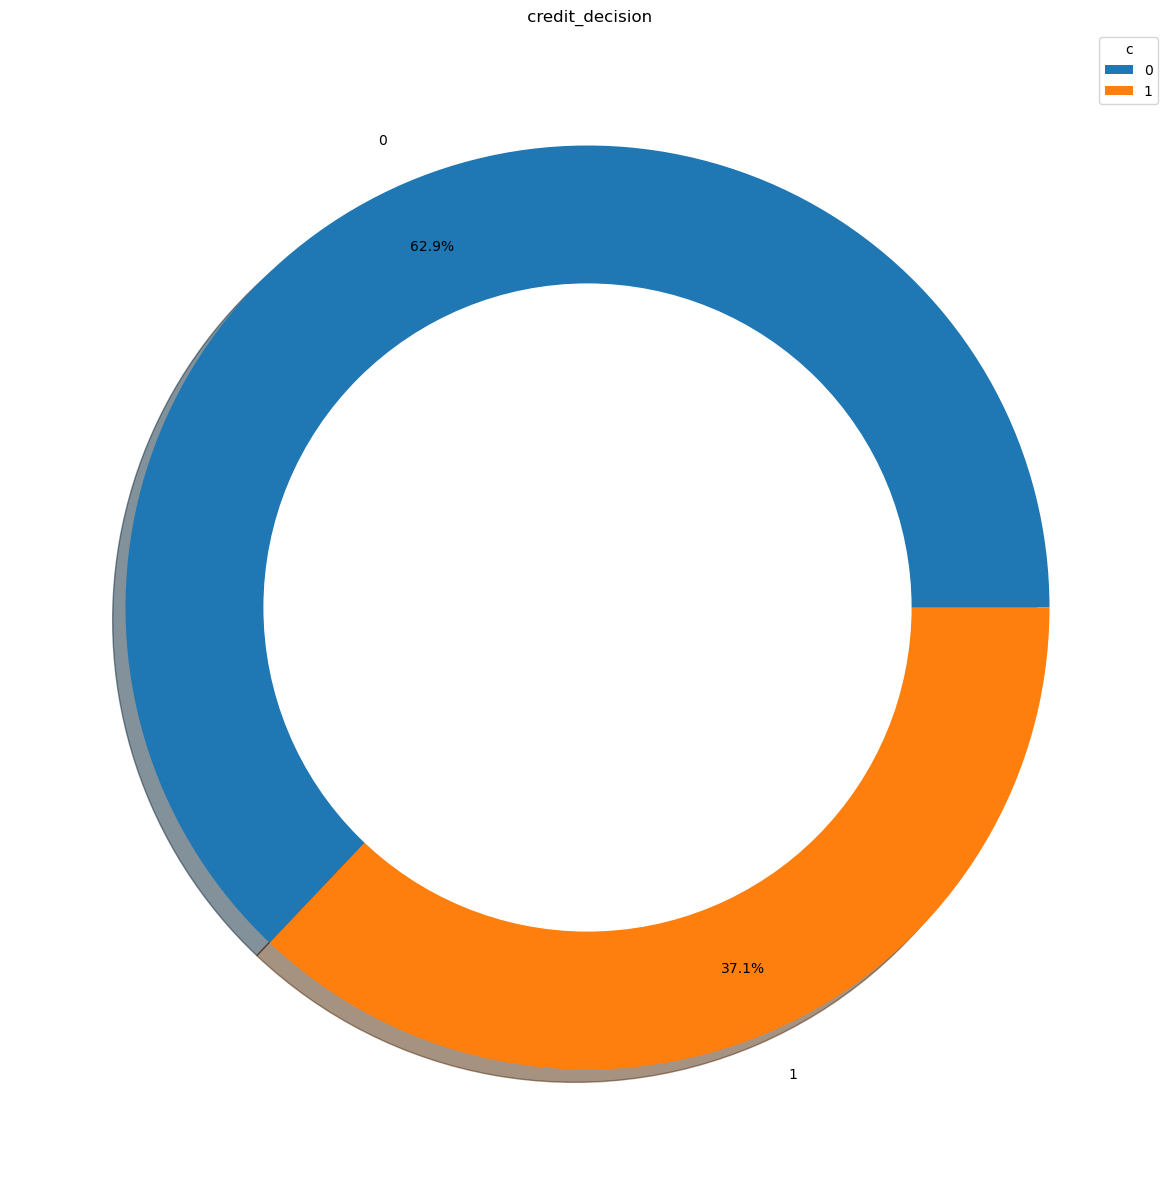

In [64]:
sizes_test = dict(target_over_df['credit_decision'].value_counts())
fig, (ax2) = plt.subplots(1, figsize=(15, 15))
ax2.set_title("Distribution of credit_decision in vf_resampled")
ax2.pie(sizes_test.values(), labels=sizes_test.keys(), autopct="%.1f%%", pctdistance=0.85, shadow=True)
ax2.set_title(" credit_decision")
ax2.legend(title="c", labels=sizes_test.keys(), bbox_to_anchor=(1, 1))
my_circle2 = plt.Circle((0, 0), 0.7, color='white')
ax2.add_artist(my_circle2)

### It's more realistic to have an imbalanced dataset, especially in the finance sector

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vf_over_df, target_over_df, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (29473, 24)
Shape of X_test: (7369, 24)
Shape of y_train: (29473, 1)
Shape of y_test: (7369, 1)


# Modeling

## Logistic regression

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

LR_model = LogisticRegression(random_state=1234, multi_class='multinomial', solver='newton-cg')
LR_model.fit(X_train, y_train)
y_pred_LR = LR_model.predict(X_test)
accuracy_LR = metrics.accuracy_score(y_test, y_pred_LR)
print("LR Accuracy:", accuracy_LR)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LR Accuracy: 0.6764825620844076


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

LR_model = LogisticRegression(random_state=1234, multi_class='multinomial', solver='newton-cg')
LR_model.fit(X_train, y_train)
y_proba_LR = LR_model.predict_proba(X_test)

prob_class_1 = y_proba_LR[:, 1]  
prob_class_0 = y_proba_LR[:, 0]  
sigmoid_result = LR_model.decision_function(X_test)
print("Probability of being in class 1 (positive class):", prob_class_1)
print("Probability of being in class 0 (negative class):", prob_class_0)
print("Result of the sigmoid function:", sigmoid_result)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Probability of being in class 1 (positive class): [0.49734305 0.55310148 0.48600437 ... 0.46621989 0.44932604 0.41777099]
Probability of being in class 0 (negative class): [0.50265695 0.44689852 0.51399563 ... 0.53378011 0.55067396 0.58222901]
Result of the sigmoid function: [-0.00531395  0.10660497 -0.02799857 ... -0.06766329 -0.10169706
 -0.16596523]


In [68]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test, y_pred_LR)
print("Log Loss:", logloss)


Log Loss: 11.660750397564838


the higher log loss suggests that the model's predictions are not very accurate,  so i'm going to fine tune the hyperparameters


In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

lr_model = LogisticRegression(random_state=1234)
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='neg_log_loss')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
test_log_loss = log_loss(y_test, best_model.predict_proba(X_test))
print("Test Log Loss:", test_log_loss)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validati

Best Hyperparameters: {'C': 10, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
Test Log Loss: 0.5639424666362877


In [70]:
from sklearn.metrics import accuracy_score

best_model_accuracy = accuracy_score(y_test, best_model.predict(X_test))

print("Accuracy of the best model:", best_model_accuracy)


Accuracy of the best model: 0.7526122947482697


In [71]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

precision = precision_score(y_test, best_model.predict(X_test))
recall = recall_score(y_test, best_model.predict(X_test))
conf_matrix = confusion_matrix(y_test, best_model.predict(X_test))

print("Precision of the best model:", precision)
print("Recall of the best model:", recall)
print("Confusion Matrix:\n", conf_matrix)


Precision of the best model: 0.7051162790697675
Recall of the best model: 0.5604436229205175
Confusion Matrix:
 [[4030  634]
 [1189 1516]]


In [72]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, best_model.predict(X_test))

In [73]:
f1

0.6245108135942328

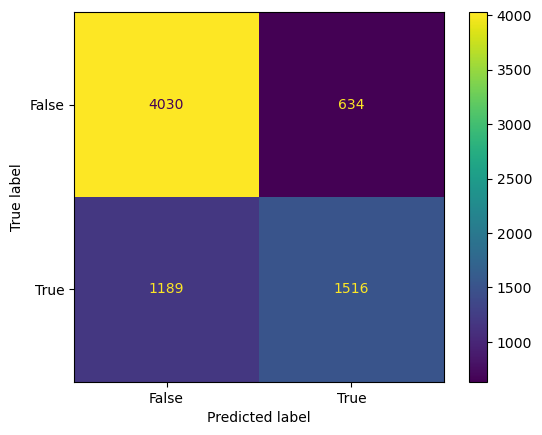

In [74]:
confusion_matrix = metrics.confusion_matrix(y_test,best_model.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [75]:
from sklearn.decomposition import PCA

pca_train = PCA()
principal_components_train = pca_train.fit_transform(X_train)
explained_variance_ratio_train = pca_train.explained_variance_ratio_
X_train_pca = pd.DataFrame(X_train, columns=X_train.columns)

X_train_pca

Actifs courants  Disponibilités    Stocks  Actifs à long terme  \
16185        -0.070942       -0.087595 -0.093935            -0.107060   
28631        -0.072416       -0.090843 -0.106760            -0.108487   
6988         -0.071205       -0.090799 -0.108979            -0.006899   
31682        -0.072649       -0.090847 -0.108979            -0.113017   
12989        -0.067771       -0.076458 -0.030574            -0.111563   
...                ...             ...       ...                  ...   
16850         0.040646        0.599505  0.571047             0.010577   
6265         -0.072653       -0.090839 -0.108979            -0.113149   
11284        -0.072644       -0.090827 -0.108979            -0.113153   
860          -0.072649       -0.090773 -0.108979            -0.111343   
15795        -0.055632       -0.073320  0.071415            -0.090790   

       Passifs courants  Valeur nette  Bénéfice net  Actifs fixes  \
16185         -0.108012     -0.068631     -0.087451     -0.086532   
28631         -0.092637     -0.067289     -0.093862     -0.086351   
6988          -0.098666      0.001980     -0.088505     -0.086532   
31682         -0.110066     -0.071805     -0.094470     -0.085621   
12989         -0.110143     -0.068094     -0.082529     -0.063217   
...                 ...           ...           ...           ...   
16850          0.043894      0.002922      0.131525     -0.086532   
6265          -0.112026     -0.073040     -0.094354     -0.086532   
11284         -0.112011     -0.073042     -0.094346     -0.086532   
860           -0.036705     -0.041672     -0.094507     -0.086532   
15795         -0.063413     -0.068341      0.009232     -0.086532   

       Ratio de couverture des intérêts  Ratio de liquidité  \
16185                         -0.048905           -0.027131   
28631                         -0.049179           -0.027303   
6988                          -0.049123           -0.026971   
31682                         -0.049150           -0.027366   
12989                         -0.048910           -0.027016   
...                                 ...                 ...   
16850                         -0.048929           -0.027227   
6265                          -0.049108           -0.027200   
11284                         -0.047800           -0.027242   
860                           -0.049190           -0.027371   
15795                         -0.049075           -0.027261   

       Ratio de bénéfice exploitation  Trésorerie nette par action  \
16185                       -0.009429                    -0.035457   
28631                       -0.009499                    -0.035457   
6988                        -0.009292                    -0.035457   
31682                       -0.009578                    -0.035449   
12989                       -0.009452                    -0.035454   
...                               ...                          ...   
16850                       -0.009297                    -0.035457   
6265                        -0.008427                    -0.035456   
11284                       -0.009459                    -0.035457   
860                         -0.009585                    -0.034909   
15795                       -0.009034                    -0.035457   

       Stockholders_equity_to_fixed_assets_ratio  Current_debt_ratio  \
16185                                  -0.024085           -0.035094   
28631                                  -0.011963           -0.027792   
6988                                   -0.024227           -0.034186   
31682                                  -0.024243            0.009065   
12989                                  -0.024213           -0.035354   
...                                          ...                 ...   
16850                                  -0.023647           -0.035223   
6265                                   -0.024242           -0.033691   
11284                                  -0.024242       

In [76]:
import numpy as np

# Applying logarithm transformation to X_train_pca
X_train_pca_log = np.log(X_train_pca + 1)  # Adding 1 to avoid log(0)

print(X_train_pca_log)


       Actifs courants  Disponibilités    Stocks  Actifs à long terme  \
16185        -0.073584       -0.091672 -0.098645            -0.113236   
28631        -0.075172       -0.095238 -0.112899            -0.114835   
6988         -0.073867       -0.095189 -0.115387            -0.006923   
31682        -0.075423       -0.095242 -0.115387            -0.119929   
12989        -0.070176       -0.079539 -0.031051            -0.118291   
...                ...             ...       ...                  ...   
16850         0.039841        0.469694  0.451742             0.010521   
6265         -0.075428       -0.095233 -0.115387            -0.120079   
11284        -0.075418       -0.095220 -0.115387            -0.120083   
860          -0.075424       -0.095161 -0.115387            -0.118044   
15795        -0.057239       -0.076147  0.068981            -0.095179   

       Passifs courants  Valeur nette  Bénéfice net  Actifs fixes  \
16185         -0.114302     -0.071100     -0.091514   

C:\Users\user\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning:

invalid value encountered in log



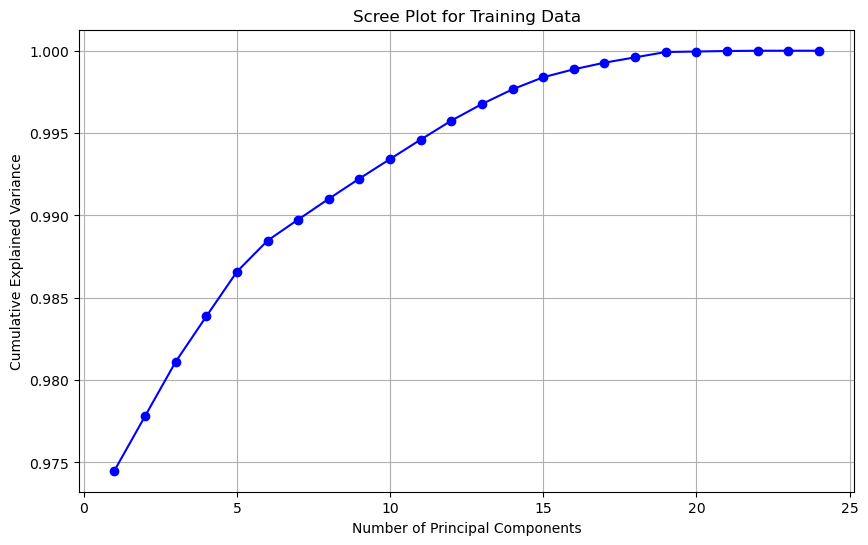

In [77]:
cumulative_variance_train = np.cumsum(explained_variance_ratio_train)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_train) + 1), cumulative_variance_train, marker='o', linestyle='-', color='b')
plt.title('Scree Plot for Training Data')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

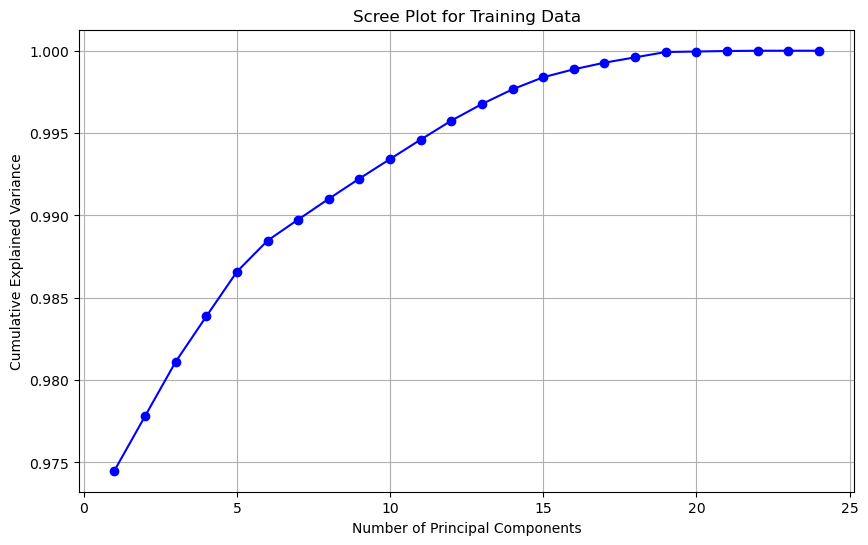

In [78]:
import numpy as np
import matplotlib.pyplot as plt

cumulative_variance_train = np.cumsum(explained_variance_ratio_train)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_train) + 1), cumulative_variance_train, marker='o', linestyle='-', color='b')
plt.title('Scree Plot for Training Data')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


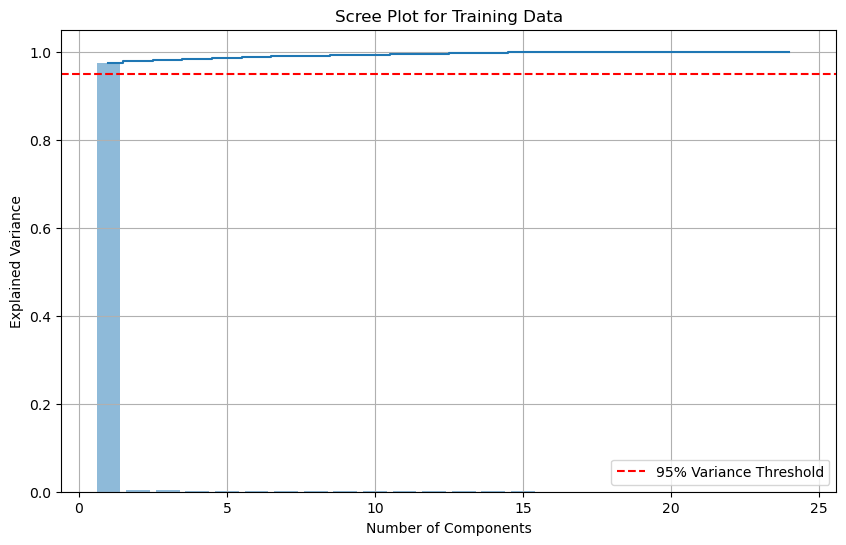

In [79]:
# Create the scree plot for data_train
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio_train) + 1), explained_variance_ratio_train, alpha=0.5, align='center')
plt.step(range(1, len(explained_variance_ratio_train) + 1), np.cumsum(explained_variance_ratio_train), where='mid')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot for Training Data')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.grid()
plt.legend()
plt.show()


### Feature Importances from Logistic Regression Model

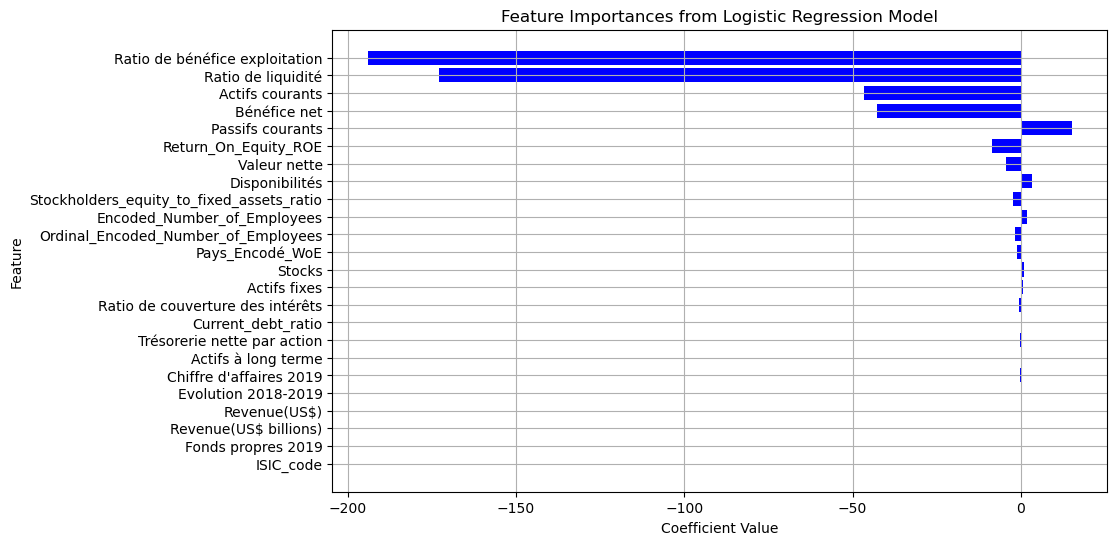

In [80]:
import matplotlib.pyplot as plt

coefficients = best_model.coef_[0]
feature_names = X_train.columns
sorted_indices = np.argsort(np.abs(coefficients))
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_coefficients, color='b')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importances from Logistic Regression Model')
plt.grid(True)
plt.show()


horizontal bar plot where the length of each bar represents the coefficient value associated with the corresponding feature. Positive coefficients indicate features that positively influence the target variable, while negative coefficients indicate features that negatively influence the target variable.

In [81]:
from sklearn.feature_selection import SelectKBest, chi2
# Take the square of each feature value to ensure non-negativity
X_train_squared = X_train ** 2

# Instantiate SelectKBest to select the top k features based on chi-squared test
k_best = SelectKBest(score_func=chi2, k=10)  # Select top 10 features

# Fit SelectKBest to your transformed training data
X_train_selected = k_best.fit_transform(X_train_squared, y_train)

# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X_train.columns[selected_feature_indices]

# Print the names of the selected features
print("Selected Features:", selected_feature_names)


Selected Features: Index(['Passifs courants', 'Valeur nette', 'Bénéfice net', 'Actifs fixes',
       'Ratio de couverture des intérêts', 'Ratio de liquidité',
       'Ratio de bénéfice exploitation', 'Trésorerie nette par action',
       'Stockholders_equity_to_fixed_assets_ratio', 'ISIC_code'],
      dtype='object')


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
sfm = SelectFromModel(rf_classifier, threshold='median')  
X_train_selected = sfm.fit_transform(X_train, y_train)
selected_feature_indices = sfm.get_support(indices=True)
selected_feature_names = X_train.columns[selected_feature_indices]
print("Selected Features:", selected_feature_names)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Selected Features: Index(['Actifs courants', 'Disponibilités', 'Stocks', 'Actifs à long terme',
       'Passifs courants', 'Valeur nette', 'Bénéfice net', 'Actifs fixes',
       'Ratio de liquidité', 'Ratio de bénéfice exploitation',
       'Stockholders_equity_to_fixed_assets_ratio', 'Current_debt_ratio'],
      dtype='object')


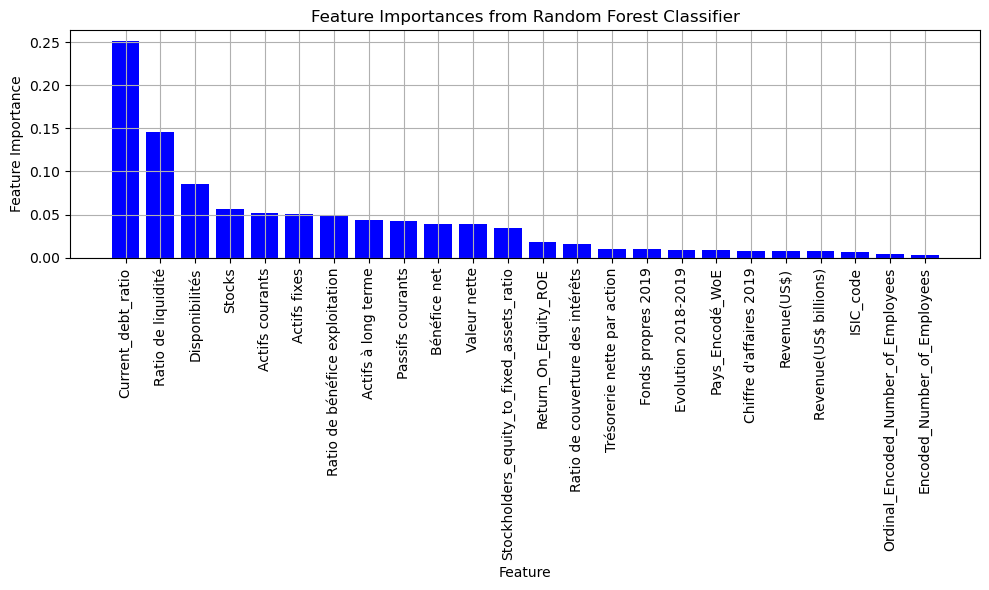

In [83]:
import matplotlib.pyplot as plt
feature_importances = rf_classifier.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = X_train.columns[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_names)), sorted_feature_importances, color='b')
plt.xticks(range(len(sorted_feature_names)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importances from Random Forest Classifier')
plt.grid(True)
plt.tight_layout()
plt.show()


In [84]:
# Get the coefficients of the logistic regression model
coefficients = best_model.coef_[0]
feature_names = X_train.columns
sorted_indices = np.argsort(np.abs(coefficients))
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Print the sorted coefficients and feature names
for coef, feature_name in zip(sorted_coefficients, sorted_feature_names):
    print(f'{feature_name}: {coef}')


ISIC_code: -0.0034402424515495907
Fonds propres 2019: 0.007684981556527742
Revenue(US$ billions): -0.029799825885651297
Revenue(US$): -0.03806731154995485
Evolution 2018-2019: -0.057409040427348665
Chiffre d'affaires 2019: -0.10076285865198112
Actifs à long terme: 0.12818431647877962
Trésorerie nette par action: -0.14838781304819004
Current_debt_ratio: 0.3544087458166535
Ratio de couverture des intérêts: -0.6416164549752128
Actifs fixes: 0.6928533143456735
Stocks: 0.9232504126228721
Pays_Encodé_WoE: -1.1420482851536464
Ordinal_Encoded_Number_of_Employees: -1.7365936233925756
Encoded_Number_of_Employees: 1.8677399262722592
Stockholders_equity_to_fixed_assets_ratio: -2.1977878659953167
Disponibilités: 3.2680807344583527
Valeur nette: -4.539411567965923
Return_On_Equity_ROE: -8.54005073977018
Passifs courants: 15.222599754140317
Bénéfice net: -42.82868324381771
Actifs courants: -46.72072886530227
Ratio de liquidité: -172.8769849369391
Ratio de bénéfice exploitation: -194.1418057753137


In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

sfm = SelectFromModel(rf_classifier, threshold='median') 
X_train_selected = sfm.fit_transform(X_train, y_train)
selected_feature_indices = sfm.get_support(indices=True)
selected_feature_names = X_train.columns[selected_feature_indices]
print("Selected Features:", selected_feature_names)
logistic_model_selected_features = LogisticRegression(random_state=1234)
logistic_model_selected_features.fit(X_train_selected, y_train)
X_test_selected = sfm.transform(X_test)
y_pred_selected_features = logistic_model_selected_features.predict(X_test_selected)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Selected Features: Index(['Actifs courants', 'Disponibilités', 'Stocks', 'Actifs à long terme',
       'Passifs courants', 'Valeur nette', 'Bénéfice net', 'Actifs fixes',
       'Ratio de liquidité', 'Ratio de bénéfice exploitation',
       'Stockholders_equity_to_fixed_assets_ratio', 'Current_debt_ratio'],
      dtype='object')


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [86]:
from sklearn.metrics import accuracy_score
accuracy_selected_features = accuracy_score(y_test, y_pred_selected_features)
print("Accuracy with selected features:", accuracy_selected_features)


Accuracy with selected features: 0.640521101913421


In [87]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

logistic_model_selected_features = LogisticRegression(C=10, multi_class='auto', penalty='l1', solver='liblinear', random_state=1234)
logistic_model_selected_features.fit(X_train_selected, y_train)

# Predict on the test data using the model with selected features
y_pred_selected_features = logistic_model_selected_features.predict(X_test_selected)

# Calculate accuracy of the logistic regression model with selected features
accuracy_selected_features = accuracy_score(y_test, y_pred_selected_features)

print("Accuracy with selected features:", accuracy_selected_features)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy with selected features: 0.7592617722893201


C:\Users\user\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Precision: 0.8466120625465376
Recall: 0.42033271719038817
F1-score: 0.5617588932806324
ROC-AUC Score: 0.6880823105677498


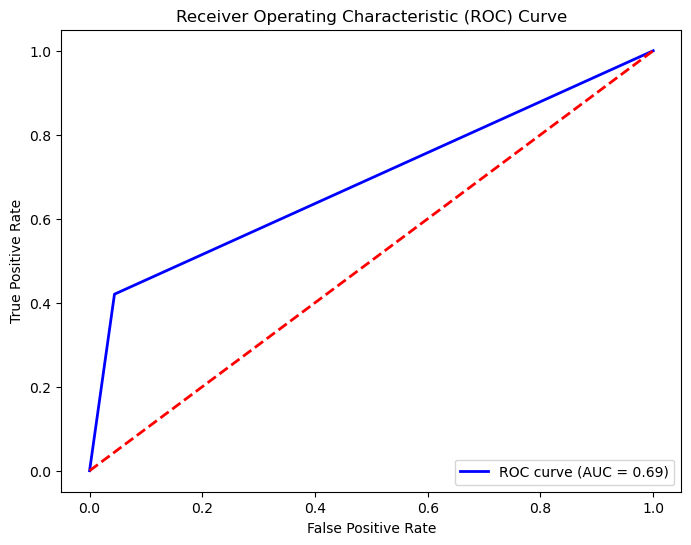

In [88]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

precision = precision_score(y_test, y_pred_selected_features)
recall = recall_score(y_test, y_pred_selected_features)
f1 = f1_score(y_test, y_pred_selected_features)
roc_auc = roc_auc_score(y_test, y_pred_selected_features)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_selected_features)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [90]:
from sklearn.linear_model import LogisticRegression

selected_features = ['Actifs courants', 'Disponibilités', 'Stocks', 'Actifs à long terme',
                     'Passifs courants', 'Valeur nette', 'Bénéfice net', 'Actifs fixes',
                     'Ratio de liquidité', 'Ratio de bénéfice exploitation',
                     'Stockholders_equity_to_fixed_assets_ratio', 'Current_debt_ratio']

X_selected = vf_over_df[selected_features]

logistic_model_selected_features = LogisticRegression(C=10, multi_class='auto', penalty='l1', solver='liblinear', random_state=1234)
logistic_model_selected_features.fit(X_selected, target_over_df)
y_prob_selected_features = logistic_model_selected_features.predict_proba(X_selected)
prob_default = y_prob_selected_features[:, 1]

vf_over_df['Probability_of_Default'] = prob_default

print(vf_over_df.head())


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



   Actifs courants  Disponibilités    Stocks  Actifs à long terme  \
0         3.429827       -0.090849 -0.108979             2.596076   
1         3.576448       -0.090849 -0.108979             2.667786   
2         3.820675       -0.090849 -0.108979             2.730670   
3         3.871151       -0.090849 -0.108979             2.946194   
4         4.073815       -0.090849 -0.108979             2.916944   

   Passifs courants  Valeur nette  Bénéfice net  Actifs fixes  \
0         10.204234      0.367349      1.470940      0.742279   
1         10.550978      0.385104      1.657520      0.743566   
2         10.869144      0.402011      1.167583      0.767649   
3         10.893920      0.417793      1.373336      0.831951   
4         11.054543      0.431883      1.465911      0.841364   

   Ratio de couverture des intérêts  Ratio de liquidité  \
0                         -0.032980           -0.027232   
1                         -0.036121           -0.027232   
2                

C:\Users\user\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [91]:
vf_over_df["Probability_of_Default"]

0        4.041056e-32
1        3.281812e-36
2        2.893542e-30
3        7.016978e-35
4        1.096852e-39
             ...     
36837    5.019696e-01
36838    4.431186e-01
36839    4.968304e-01
36840    5.154963e-01
36841    5.198219e-01
Name: Probability_of_Default, Length: 36842, dtype: float64

In [92]:
import numpy as np

high_prob_default = prob_default[prob_default <0.3]
unique_values, counts = np.unique(high_prob_default, return_counts=True)
print("Probabilities of Default > 0.3:")
for value, count in zip(unique_values, counts):
    print(f"Probability: {value}, Count: {count}")


Probabilities of Default > 0.3:
Probability: 0.0, Count: 36
Probability: 2.447923452459231e-304, Count: 1
Probability: 4.930710010681776e-302, Count: 1
Probability: 1.900985059316201e-295, Count: 1
Probability: 1.0087340462831822e-286, Count: 1
Probability: 1.553257043280176e-277, Count: 1
Probability: 7.900952175065892e-276, Count: 1
Probability: 1.1148762400655791e-275, Count: 1
Probability: 1.554317173471654e-269, Count: 1
Probability: 5.513748448748744e-265, Count: 1
Probability: 2.0051969695881342e-264, Count: 1
Probability: 5.4069963680688485e-261, Count: 1
Probability: 6.208968586704573e-258, Count: 1
Probability: 1.1616132353520309e-253, Count: 1
Probability: 7.867289264573375e-243, Count: 1
Probability: 2.4482371073102185e-235, Count: 1
Probability: 3.138610803212508e-234, Count: 1
Probability: 1.9698339116974238e-229, Count: 1
Probability: 4.3042531927048726e-229, Count: 1
Probability: 2.8741083161798163e-224, Count: 1
Probability: 1.2261748409952544e-223, Count: 1
Probabilit

In [93]:
import numpy as np

epsilon = 1e-2 
filtered_indices = vf_over_df[vf_over_df["Probability_of_Default"] < epsilon].index
vf_over_df.reset_index(drop=True, inplace=True)
vf_over_df_filtered = vf_over_df.drop(filtered_indices)
target.reset_index(drop=True, inplace=True)
target_filtered = target_over_df.drop(filtered_indices)
print("Shape of filtered dataset:", vf_over_df_filtered.shape)
print("Shape of filtered target dataset:", target_filtered.shape)


Shape of filtered dataset: (33535, 25)
Shape of filtered target dataset: (33535, 1)


In [94]:
import pandas as pd

concatenated_df = pd.concat([vf_over_df_filtered, target_filtered], axis=1)
print("Shape of concatenated DataFrame:", concatenated_df.shape)
print(concatenated_df.head())


Shape of concatenated DataFrame: (33535, 26)
    Actifs courants  Disponibilités    Stocks  Actifs à long terme  \
16         5.479836       -0.090849 -0.108979             6.184724   
18         5.534536       -0.090849 -0.108979             6.521348   
36         6.743559       -0.090849 -0.108979             6.445037   
40        -0.044256       -0.090849 -0.108979            -0.078140   
41        -0.041137       -0.090849 -0.108979            -0.075948   

    Passifs courants  Valeur nette  Bénéfice net  Actifs fixes  \
16         18.719049      0.539782      0.673152      1.157825   
18         18.230889      0.538186      0.268520      1.142713   
36         22.865825      0.789808     -0.070485      1.279060   
40         -0.009270     -0.066528     -0.039946     -0.079530   
41          0.000547     -0.066330     -0.042453     -0.079597   

    Ratio de couverture des intérêts  Ratio de liquidité  \
16                         -0.039226           -0.027228   
18               

In [95]:
import pandas as pd

risk_levels = [
    "Very Low",
    "Low",
    "Average",
    "High",
    "Very High",
    "Too High",
    "Too High"
]

def classify_risk_level(probability):
    if probability < 0.05:
        return risk_levels[0]
    elif 0.05 <= probability < 0.15:
        return risk_levels[1]
    elif 0.15 <= probability < 0.20:
        return risk_levels[2]
    elif 0.20 <= probability < 0.25:
        return risk_levels[3]
    elif 0.25 <= probability < 0.50:
        return risk_levels[4]
    elif 0.5 <= probability < 0.75:
        return risk_levels[5]
    else:
        return risk_levels[6]

def add_risk_level(df):
    df['Risk_Level'] = df.apply(lambda row: classify_risk_level(row['Probability_of_Default']) if row['credit_decision'] == 1 else None, axis=1)
    return df

concatenated_df = add_risk_level(concatenated_df)
print(concatenated_df.head())


    Actifs courants  Disponibilités    Stocks  Actifs à long terme  \
16         5.479836       -0.090849 -0.108979             6.184724   
18         5.534536       -0.090849 -0.108979             6.521348   
36         6.743559       -0.090849 -0.108979             6.445037   
40        -0.044256       -0.090849 -0.108979            -0.078140   
41        -0.041137       -0.090849 -0.108979            -0.075948   

    Passifs courants  Valeur nette  Bénéfice net  Actifs fixes  \
16         18.719049      0.539782      0.673152      1.157825   
18         18.230889      0.538186      0.268520      1.142713   
36         22.865825      0.789808     -0.070485      1.279060   
40         -0.009270     -0.066528     -0.039946     -0.079530   
41          0.000547     -0.066330     -0.042453     -0.079597   

    Ratio de couverture des intérêts  Ratio de liquidité  \
16                         -0.039226           -0.027228   
18                         -0.019082           -0.027219   
36

In [96]:
concatenated_df

Actifs courants  Disponibilités    Stocks  Actifs à long terme  \
16            5.479836       -0.090849 -0.108979             6.184724   
18            5.534536       -0.090849 -0.108979             6.521348   
36            6.743559       -0.090849 -0.108979             6.445037   
40           -0.044256       -0.090849 -0.108979            -0.078140   
41           -0.041137       -0.090849 -0.108979            -0.075948   
...                ...             ...       ...                  ...   
36837        -0.072622       -0.090846 -0.108687            -0.108697   
36838        -0.072626       -0.090848 -0.108810            -0.108112   
36839        -0.072509       -0.090849 -0.107923            -0.109267   
36840        -0.072621       -0.090848 -0.108784            -0.106536   
36841        -0.072641       -0.090849 -0.108903            -0.109529   

       Passifs courants  Valeur nette  Bénéfice net  Actifs fixes  \
16            18.719049      0.539782      0.673152      1.157825   
18            18.230889      0.538186      0.268520      1.142713   
36            22.865825      0.789808     -0.070485      1.279060   
40            -0.009270     -0.066528     -0.039946     -0.079530   
41             0.000547     -0.066330     -0.042453     -0.079597   
...                 ...           ...           ...           ...   
36837         -0.108548     -0.071968     -0.094318     -0.080828   
36838         -0.108917     -0.072193     -0.094338     -0.080274   
36839         -0.106639     -0.066470     -0.094308     -0.083655   
36840         -0.108129     -0.071843     -0.094312     -0.079313   
36841         -0.110131     -0.072250     -0.094431     -0.083720   

       Ratio de couverture des intérêts  Ratio de liquidité  \
16                            -0.039226           -0.027228   
18                            -0.019082           -0.027219   
36                            -0.046892           -0.027238   
40                            -0.043932           -0.027231   
41                            -0.046836           -0.027233   
...                                 ...                 ...   
36837                         -0.047369           -0.027324   
36838                         -0.047109           -0.025973   
36839                         -0.046446           -0.027335   
36840                         -0.005879           -0.027238   
36841                          0.018508           -0.027229   

       Ratio de bénéfice exploitation  Trésorerie nette par action  \
16                          -0.009477                    -0.035448   
18                          -0.009380                    -0.035443   
36                          -0.009560                    -0.035443   
40                          -0.009343                    -0.035426   
41                          -0.009400                    -0.035264   
...                               ...                          ...   
36837                       -0.009541                    -0.035456   
36838                       -0.009493                    -0.035449   
36839                       -0.009443                    -0.035456   
36840                       -0.009470                    -0.035456   
36841                       -0.009459                    -0.035456   

       Stockholders_equity_to_fixed_assets_ratio  Current_debt_ratio  \
16                                     -0.033412           -0.034957   
18                                     -0.033428           -0.034973   
36                                     -0.033298           -0.034960   
40                                     -0.032930           -0.034927   
41                                     -0.032977           -0.034933   
...                                          ...                 ...   
36837                                  -0.024245           -0.021550   
36838                                  -0.024185           -0.013170   
36839                                  -0.024242       

In [97]:
! pip install Augmentor

## Data Augmentation

data augmentation is a powerful technique that contributes to building more robust, generalizable, and effective machine learning models.

In [98]:
import pandas as pd

new_records = concatenated_df.sample(n=100000, replace=True, random_state=42)
augmented_df = pd.concat([concatenated_df, new_records], ignore_index=True)
augmented_df = augmented_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [99]:
augmented_df.shape

(133535, 27)

In [100]:
augmented_df.describe()

Actifs courants  Disponibilités         Stocks  Actifs à long terme  \
count    133535.000000   133535.000000  133535.000000        133535.000000   
mean         -0.066879       -0.077858      -0.094893            -0.082761   
std           0.068063        0.162866       0.129069             0.158466   
min          -0.072654       -0.090849      -0.108979            -0.113169   
25%          -0.072599       -0.090846      -0.108979            -0.112522   
50%          -0.072210       -0.090763      -0.108941            -0.109861   
75%          -0.069652       -0.087190      -0.106187            -0.099352   
max           6.743559       31.113147      11.522438             6.521348   

       Passifs courants   Valeur nette   Bénéfice net   Actifs fixes  \
count     133535.000000  133535.000000  133535.000000  133535.000000   
mean          -0.093415      -0.060503      -0.086314      -0.066000   
std            0.222973       0.044092       0.018572       0.205237   
min           -0.112040      -0.073048      -0.094507      -0.086532   
25%           -0.111260      -0.072291      -0.094507      -0.086532   
50%           -0.108904      -0.070365      -0.094141      -0.086532   
75%           -0.101236      -0.063420      -0.088632      -0.085191   
max           22.865825       2.071604       0.673152      14.514820   

       Ratio de couverture des intérêts  Ratio de liquidité  \
count                     133535.000000       133535.000000   
mean                          -0.019727           -0.026732   
std                            0.737708            0.002126   
min                           -0.049190           -0.027377   
25%                           -0.049161           -0.027319   
50%                           -0.049037           -0.027240   
75%                           -0.048498           -0.027105   
max                           87.990432           -0.000209   

       Ratio de bénéfice exploitation  Trésorerie nette par action  \
count                   133535.000000                133535.000000   
mean                        -0.009349                    -0.010650   
std                          0.000744                     0.903377   
min                         -0.009585                    -0.035457   
25%                         -0.009515                    -0.035457   
50%                         -0.009457                    -0.035457   
75%                         -0.009399                    -0.035455   
max                          0.012243                   131.230631   

       Stockholders_equity_to_fixed_assets_ratio  Current_debt_ratio  \
count                              133535.000000       133535.000000   
mean                                   -0.020096            0.050557   
std                                     0.033308            1.136971   
min                                    -0.033893           -0.035405   
25%                                    -0.024243           -0.035194   
50%                                    -0.024242           -0.034771   
75%                                    -0.024110           -0.029482   
max                                     1.182818          124.007068   

       Return_On_Equity_ROE  Chiffre d'affaires 2019  Evolution 2018-2019  \
count         133535.000000            133535.000000        133535.000000   
mean              -0.004890                -0.046525             0.012943   
std                0.608407                 0.935300             0.977512   
min               -0.010477                -0.602233            -0.972144   
25%               -0.010443                -0.567921            -0.719112   
50%               -0.010395                -0.427914            -0.388506   
75%               -0.010244                 0.113666             0.681914   
max              152.110804                 4.076499             4.168803   

       Fonds propres 2019  Revenue(US$ billions)      ISIC_code  \
count       133535.000000          133535.0000

In [101]:
augmented_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133535 entries, 0 to 133534
Data columns (total 27 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Actifs courants                            133535 non-null  float64
 1   Disponibilités                             133535 non-null  float64
 2   Stocks                                     133535 non-null  float64
 3   Actifs à long terme                        133535 non-null  float64
 4   Passifs courants                           133535 non-null  float64
 5   Valeur nette                               133535 non-null  float64
 6   Bénéfice net                               133535 non-null  float64
 7   Actifs fixes                               133535 non-null  float64
 8   Ratio de couverture des intérêts           133535 non-null  float64
 9   Ratio de liquidité                         133535 non-null  float64
 10  Ratio de

In [102]:
new_dataset = augmented_df.drop(['Probability_of_Default', 'credit_decision', 'Risk_Level'], axis=1)


In [103]:
new_target = augmented_df.credit_decision

new_target

0         1
1         0
2         0
3         0
4         0
         ..
133530    0
133531    0
133532    0
133533    0
133534    1
Name: credit_decision, Length: 133535, dtype: int64

In [104]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(new_dataset, new_target, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train1.shape)
print("Shape of X_test:", X_test1.shape)
print("Shape of y_train:", y_train1.shape)
print("Shape of y_test:", y_test1.shape)


Shape of X_train: (106828, 24)
Shape of X_test: (26707, 24)
Shape of y_train: (106828,)
Shape of y_test: (26707,)


In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

param_grid_lda = {'solver': ['svd', 'lsqr', 'eigen']}
param_grid_logreg = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_nb = {}  

grid_search_lda = GridSearchCV(LinearDiscriminantAnalysis(), param_grid_lda, cv=5, scoring='recall')
grid_search_lda.fit(X_train1, y_train1)
best_params_lda = grid_search_lda.best_params_

grid_search_logreg = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_logreg, cv=5, scoring='recall')
grid_search_logreg.fit(X_train1, y_train1)
best_params_logreg = grid_search_logreg.best_params_

print("Best hyperparameters for LDA:", best_params_lda)
print("Best hyperparameters for Logistic Regression:", best_params_logreg)

best_lda = grid_search_lda.best_estimator_
best_logreg = grid_search_logreg.best_estimator_
best_nb = GaussianNB()

best_lda.fit(X_train1, y_train1)
best_logreg.fit(X_train1, y_train1)
best_nb.fit(X_train1, y_train1)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


4 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py", line 637, in fit
    self._solve_eigen

Best hyperparameters for LDA: {'solver': 'svd'}
Best hyperparameters for Logistic Regression: {'C': 100, 'penalty': 'l2'}


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



GaussianNB()

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Linear Discriminant Analysis:
Recall: 0.44808592674194436
Precision: 0.6902842596521002
F1-score: 0.5434201736806947

Logistic Regression:
Recall: 0.41044707610391995
Precision: 0.6279494382022472
F1-score: 0.4964192527618942

Naive Bayes:
Recall: 0.9321582667768291
Precision: 0.4150758288026816
F1-score: 0.5743862427876456


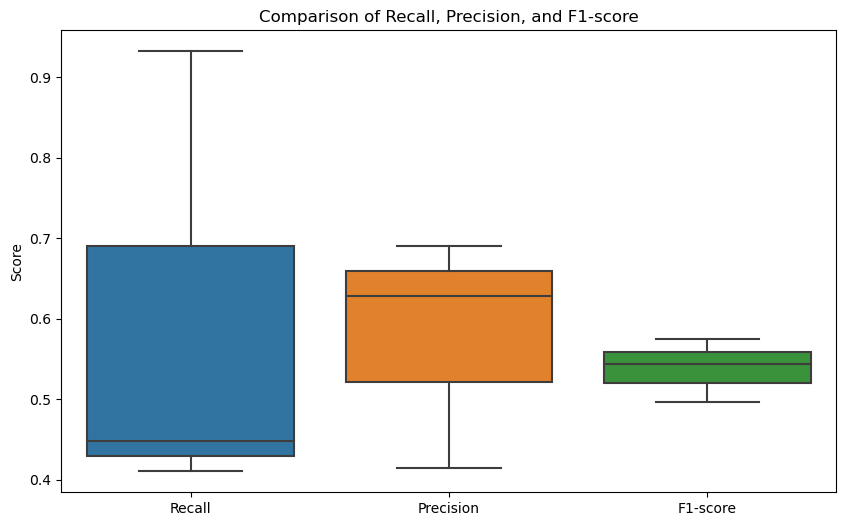

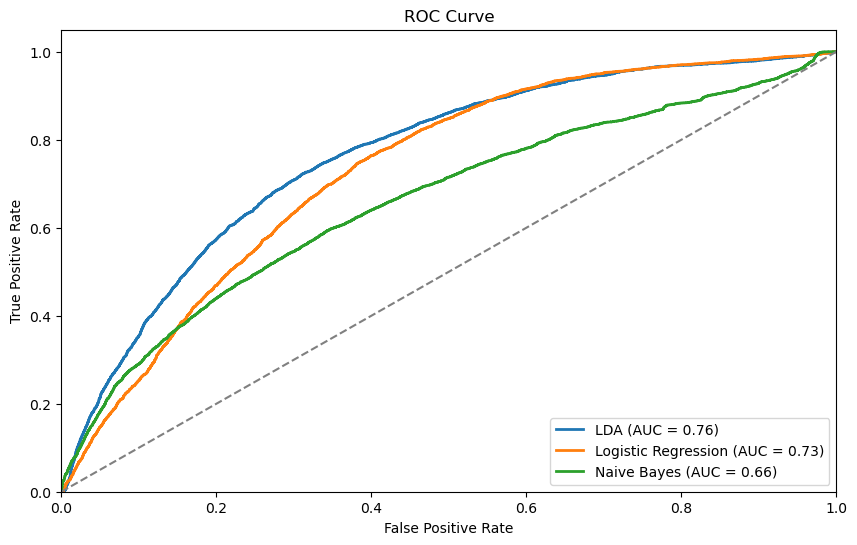

In [106]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

seed = 42
best_lda = LinearDiscriminantAnalysis(solver='svd')
best_logreg = LogisticRegression(C=100, penalty='l2', max_iter=1000)
best_nb = GaussianNB()

best_lda.fit(X_train1, y_train1)
best_logreg.fit(X_train1, y_train1)
best_nb.fit(X_train1, y_train1)

y_pred_proba_lda = best_lda.predict_proba(X_test1)[:, 1]
y_pred_proba_logreg = best_logreg.predict_proba(X_test1)[:, 1]
y_pred_proba_nb = best_nb.predict_proba(X_test1)[:, 1]

y_pred_lda = best_lda.predict(X_test1)
y_pred_logreg = best_logreg.predict(X_test1)
y_pred_nb = best_nb.predict(X_test1)

fpr_lda, tpr_lda, _ = roc_curve(y_test1, y_pred_proba_lda)
roc_auc_lda = auc(fpr_lda, tpr_lda)

fpr_logreg, tpr_logreg, _ = roc_curve(y_test1, y_pred_proba_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_nb, tpr_nb, _ = roc_curve(y_test1, y_pred_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

recall_lda = recall_score(y_test1, y_pred_lda)
precision_lda = precision_score(y_test1, y_pred_lda)
f1_lda = f1_score(y_test1, y_pred_lda)

recall_logreg = recall_score(y_test1, y_pred_logreg)
precision_logreg = precision_score(y_test1, y_pred_logreg)
f1_logreg = f1_score(y_test1, y_pred_logreg)

recall_nb = recall_score(y_test1, y_pred_nb)
precision_nb = precision_score(y_test1, y_pred_nb)
f1_nb = f1_score(y_test1, y_pred_nb)

print("Linear Discriminant Analysis:")
print("Recall:", recall_lda)
print("Precision:", precision_lda)
print("F1-score:", f1_lda)

print("\nLogistic Regression:")
print("Recall:", recall_logreg)
print("Precision:", precision_logreg)
print("F1-score:", f1_logreg)

print("\nNaive Bayes:")
print("Recall:", recall_nb)
print("Precision:", precision_nb)
print("F1-score:", f1_nb)

scores = {
    'Linear Discriminant Analysis': [recall_lda, precision_lda, f1_lda],
    'Logistic Regression': [recall_logreg, precision_logreg, f1_logreg],
    'Naive Bayes': [recall_nb, precision_nb, f1_nb]
}

df_scores = pd.DataFrame(scores, index=['Recall', 'Precision', 'F1-score'])
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_scores.T)
plt.title('Comparison of Recall, Precision, and F1-score')
plt.ylabel('Score')
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(fpr_lda, tpr_lda, lw=2, label=f'LDA (AUC = {roc_auc_lda:.2f})')
plt.plot(fpr_logreg, tpr_logreg, lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_nb, tpr_nb, lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## Deploiement

In [107]:
import joblib
file_path = 'C:/deploiement/credit-scoring-website/deploiementbfifinal/credit-scoring-website/Backend/best_logreg.pkl'
joblib.dump(best_logreg, file_path)

['C:/deploiement/credit-scoring-website/deploiementbfifinal/credit-scoring-website/Backend/best_logreg.pkl']